# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. Develop a feature analysis and predictive modelling framework to identify and qualify the significant variables that influence car prices
2. Implement statistical analysis and machine learning techniques to determine feature coefficents and coreelation strength and various interactions that affect price variations
3. Create a validated regression model that measures the impact of key features(such as vehicle age, mileage, brand, condition)or price with clear statistical significant metrics
4. Generate quantifiable insights through feature selection methods and important rankings to determine which variables have the strongest preditive power for price determination

### Data Understanding

After considering the business understanding, we want to get familiar with our data. Write down some steps that you would take to get to know the dataset and identify any quality issues within. Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Perform initial Data profiling

. Load dataset and review dimensions

. Check datatypes and column names

. Generate Summmary statistics

. Calculate missing value percentage

. Examine unique values per column

Asses data quality issues

. Find and analyse missing values

. Identify potential outliers

. Check the duplicate records

. Validate data consistency

. Look for data entry errors

Conduct exploratory Analysis

. Plot variable distributions

. Create corelation matrices

. Visualize feature relations

. Analyze categorical values

. Map value ranges and frequencies

In [543]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re # from regex pattern (for extracting features)
from datetime import datetime # for deriving car's age
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer

In [544]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [545]:
# Decribing the data that has been provided using Pandas functions
# Save to df
data=pd.read_csv('data/vehicles.csv')

# Shape and preview
print('Vehicles DataFrame Shape :',data.shape)
pd.set_option('display.max_columns', None)
data.head()

Vehicles DataFrame Shape : (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [546]:
# Use Dataframe describe/view some basic statistical details like percentile, mean, std etc. of the dataset
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [547]:
# Exploring the data, lets start by describing the dataframe to get a list of provided attributes/features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [548]:
# Print percentage of Columns that are null in relation to the total number of columns
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(data[column].isnull().sum() /
                                               data[column].shape[0]))

year : 0.28%
manufacturer : 4.13%
model : 1.24%
condition : 40.79%
cylinders : 41.62%
fuel : 0.71%
odometer : 1.03%
title_status : 1.93%
transmission : 0.60%
VIN : 37.73%
drive : 30.59%
size : 71.77%
type : 21.75%
paint_color : 30.50%


In [549]:
#Check the number of Null Columns
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [550]:
data.select_dtypes(exclude='number').columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [551]:

data.select_dtypes(include='number').corr()

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


In [552]:
# We could try taking the id column out of the dataset to see if it makes a difference
# We could try taking the id column out of the dataset to see if it makes a difference
data1 = data.drop('id', axis=1)
data1.select_dtypes(include='number').corr()

,price,year,odometer
price,1.000000,-0.004925,0.010032
year,-0.004925,1.000000,-0.157215
odometer,0.010032,-0.157215,1.000000


No difference in correlation, so Car id does not have any impact on correlation. As there are many NAN's, null and  missing values, this may have an impact on the correlation. In the Data Preparation section, we will runthe correlation after cleaning the data

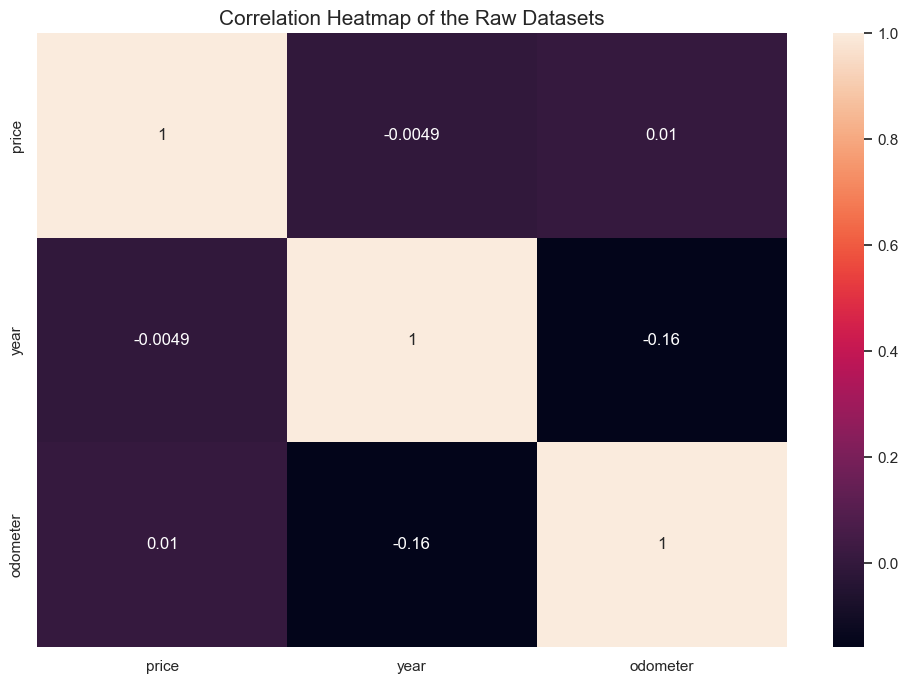

In [554]:
# Now lets look at some visualization of the provided datasets
import matplotlib.pyplot as plt
import seaborn as sns

plt.close('all')


# Select only numeric columns before computing correlation
corr_matrix = data1.select_dtypes(include='number').corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, ax=ax)

# Title and display settings
ax.set_title("Correlation Heatmap of the Raw Datasets", fontsize=15)
plt.tight_layout()
plt.show()

In [555]:
#Correlation matrix shows not strong correlation, one would expect a strong correlation between year, odometer and price
# for example, the lower the odometer the higher the price etc

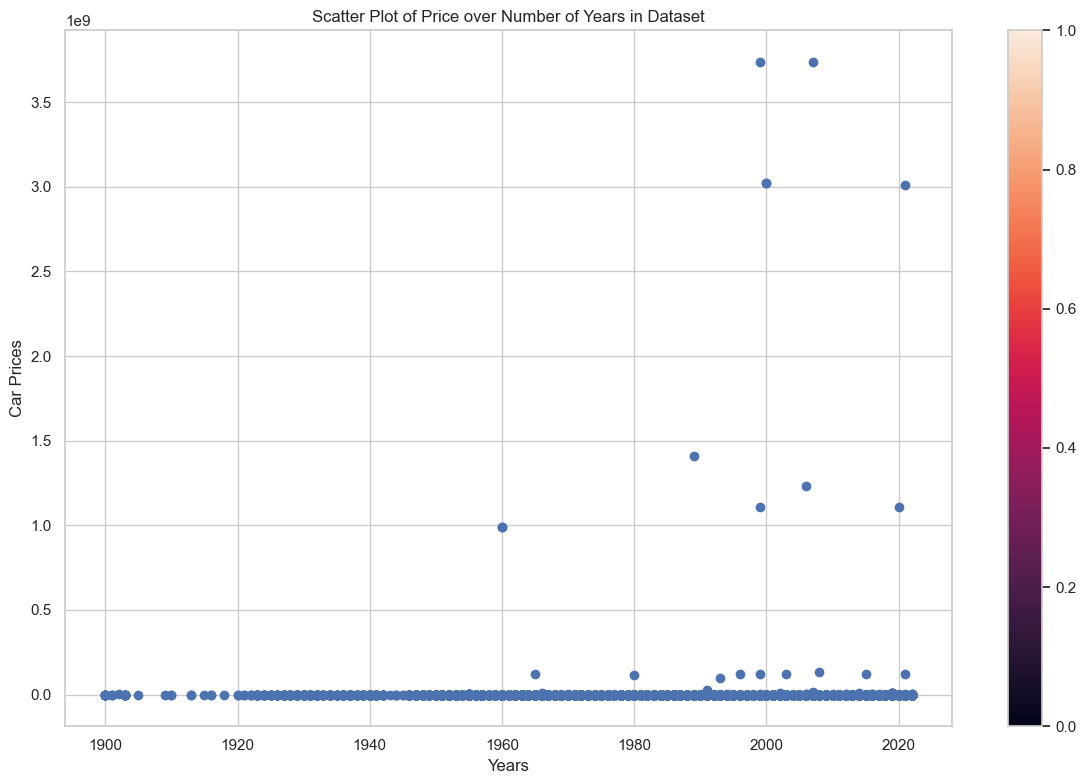

In [556]:
# Scatter plot of year of manufacture vs car price
plt.close('all')
plt.figure(figsize=(12,8))
plt.scatter(data['year'], data['price'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Price over Number of Years in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Years')
plt.ylabel('Car Prices')
plt.colorbar()
 
plt.show()

In [557]:
# The missing and NaN values in the datasets are skewing the visualizations where looking at the plots doesn't 
# make sense or provide any values, for example, the line of 0.0 are due to missing Car Prices (i.e., NaN values) which
# means you can't really see a trend of Car Prices over the number of years.
# As the chart includes 2020, I think we should see a decrease in car prices in early 2020 at the beginning of the 
# Pandemic, then followed by an increase due to supply chain issues

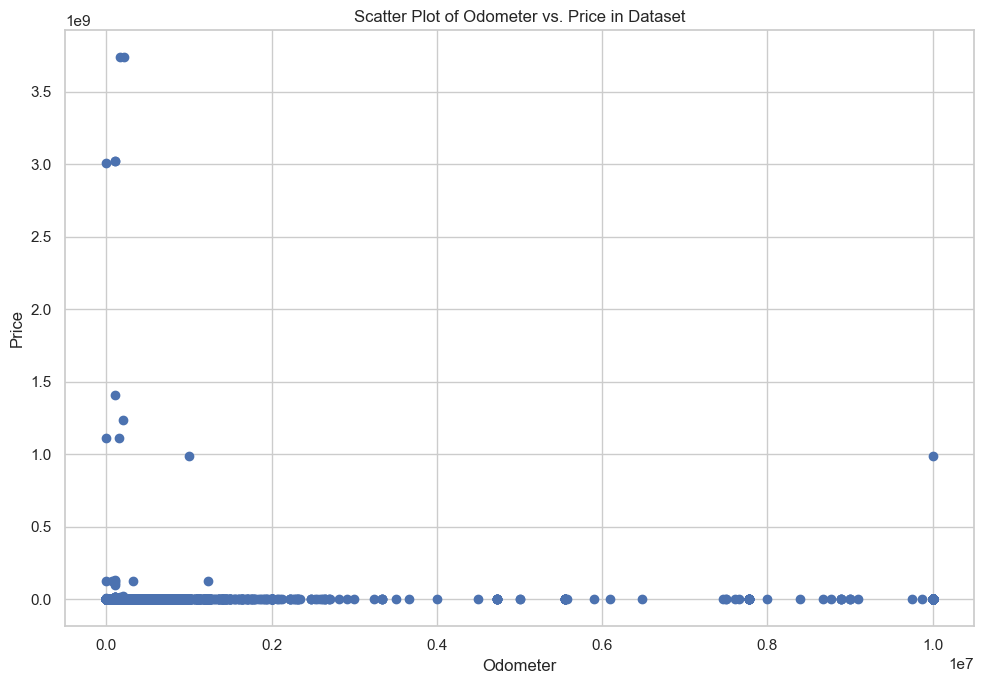

In [558]:
# Let's try a scatter plot of price vs odomoter to see if there is a Trend, i.e., the lower the odometer, the more 
# expensive or higher the car price

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(data['odometer'], data['price'])
# set a title and labels
ax.set_title('Scatter Plot of Odometer vs. Price in Dataset')
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
plt.show()

In [ ]:
# This also shows that Prices of $0 and odometer of zero are skewing the visualizations, As these are used cars, there should be a value for the odometer but you could explain price of $0 as a situation where the vehicle
# has not been evaluated and priced for the dataset. For odomoter, this could be an instance of bad data and this
#could also be the case for $0 price

In [560]:
#df1 = data[(data['price']>0) & (data['odometer']>0)]
df1 = data.query("price > 0").dropna()
df1

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy


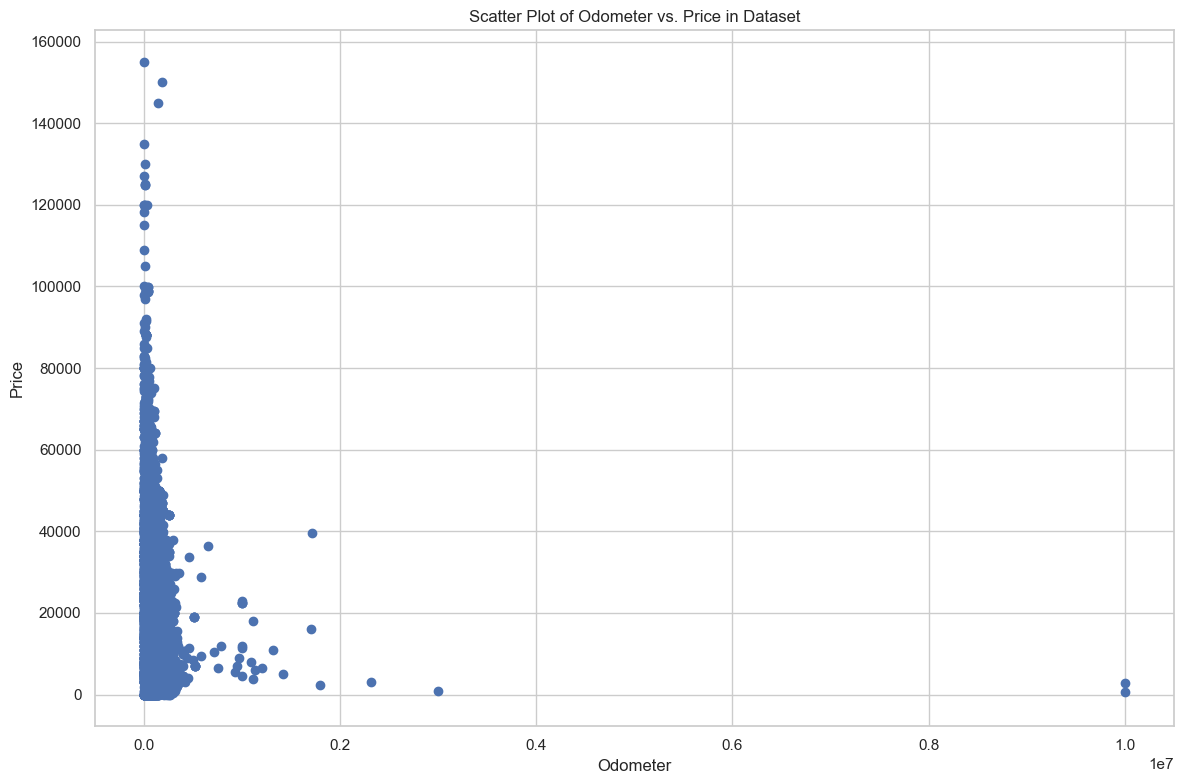

In [561]:
# Lets look at a scatter plot of the odometer and price to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df1['odometer'], df1['price'])
# set a title and labels
ax.set_title('Scatter Plot of Odometer vs. Price in Dataset')
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
plt.show()

In [562]:
# Dropping null rows reduced the record size to 32k, but the data is still skewed towards very low values. 
# See below for the min and max values of odometer and price based on current record selection

In [563]:
print("Minimum Price of cars in filtered dataset: ", df1['price'].min())
print("Maximum Price of cars in filtered dataset: ", df1['price'].max())
print("Minimum Odometer on cars in filtered dataset: ", df1['odometer'].min())
print("Maximum Odometer on cars in filtered dataset: ", df1['odometer'].max())

Minimum Price of cars in filtered dataset:  1
Maximum Price of cars in filtered dataset:  155000
Minimum Odometer on cars in filtered dataset:  0.0
Maximum Odometer on cars in filtered dataset:  9999999.0


In [564]:
# In the data preparations section, we will use the median, mean and other variables standardization techniques
# to fill in the low and zero missing values

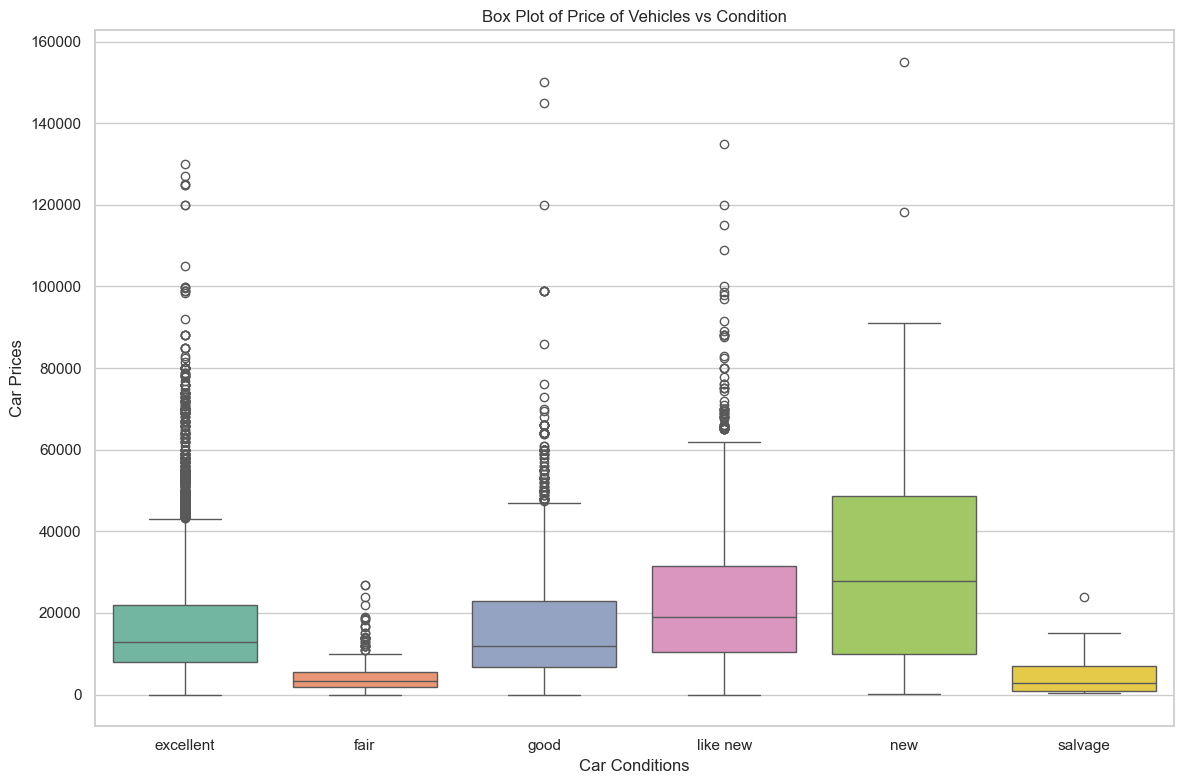

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create seaborn boxplot with custom color palette
sns.boxplot(
    x=df1["condition"],
    y=df1["price"],
    ax=ax,
    palette="Set2"  # Options: Set1, Set2, Set3, husl, coolwarm, etc.
)

# Add title and axis labels
ax.set_title("Box Plot of Price of Vehicles vs Condition")
ax.set_xlabel("Car Conditions")
ax.set_ylabel("Car Prices")

plt.show()

In [566]:
# Not surprising, "new","excellent", "like new" and "good" car conditions have the highest car prices. 
# Salvage and fair have the lowest car prices.
# All conditions have zero dollar car prices which is reflective of the missing/bad data in the dataset

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [568]:
# We start the data preparation by taking a copy of the loaded dataset and dropping null rows
data_copy = data.copy().dropna()
data_copy.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [569]:
#Let's print the number of records
data_copy.shape

(34868, 18)

In [570]:
# Reviewing the records, we can state that id and VIN are not useful for predicting the car price
# Attributes region and state are also duplicates. We can remove one for now. 
# Removing region as the unique count shows some region with 1 car

In [571]:
# Drop the following columns
data_copy.drop('id', axis=1, inplace=True)
data_copy.drop('VIN', axis=1, inplace=True)
data_copy.drop('region', axis=1, inplace=True)
data_copy

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy
426833,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy


In [572]:
#Check on which columns are nulls
data_copy.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [573]:
# There are no null values, but need to check on columns with zero values.
# we can see that there are some records with zero values

In [574]:
s = data_copy.eq(0).any()
s

price            True
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer         True
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
dtype: bool

In [575]:
# Get the count of Zeros in column 'price' 
count = (data_copy['price'] == 0).sum()
print('Count of zeros in Column  price : ', count)

Count of zeros in Column  price :  2372


In [576]:
# Get the count of Zeros in column 'odometer' 
count = (data_copy['odometer'] == 0).sum()
print('Count of zeros in Column  odometer : ', count)

Count of zeros in Column  odometer :  81


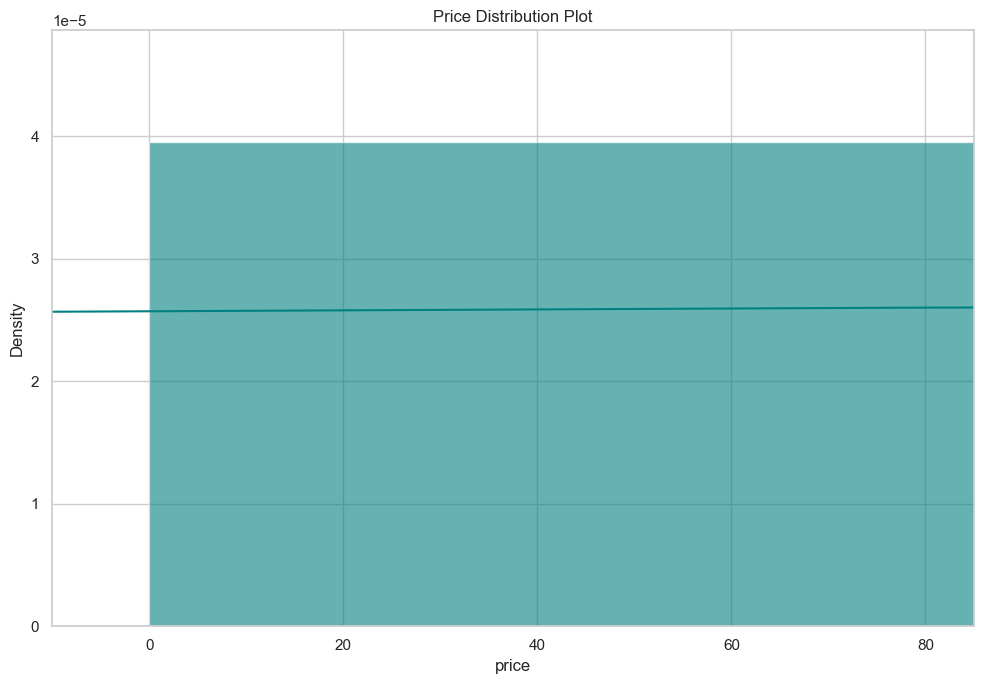

In [577]:
# Let's look at the data in Price Column and see the distribution of the values
fig, ax = plt.subplots(figsize=(10,7))
ax = data_copy["price"].hist(bins=20, density=True, stacked=True, color='teal', alpha=0.6)
data_copy["price"].plot(kind='density', color='teal')
ax.set_title('Price Distribution Plot')
ax.set(xlabel='price')
plt.xlim(-10,85)
plt.show()

In [578]:
# mean Price
print('The mean of "Price" is %.2f' %(data_copy["price"].mean(skipna=True)))
# median Price
print('The median of "Price" is %.2f' %(data_copy["price"].median(skipna=True)))

The mean of "Price" is 15837.45
The median of "Price" is 12000.00


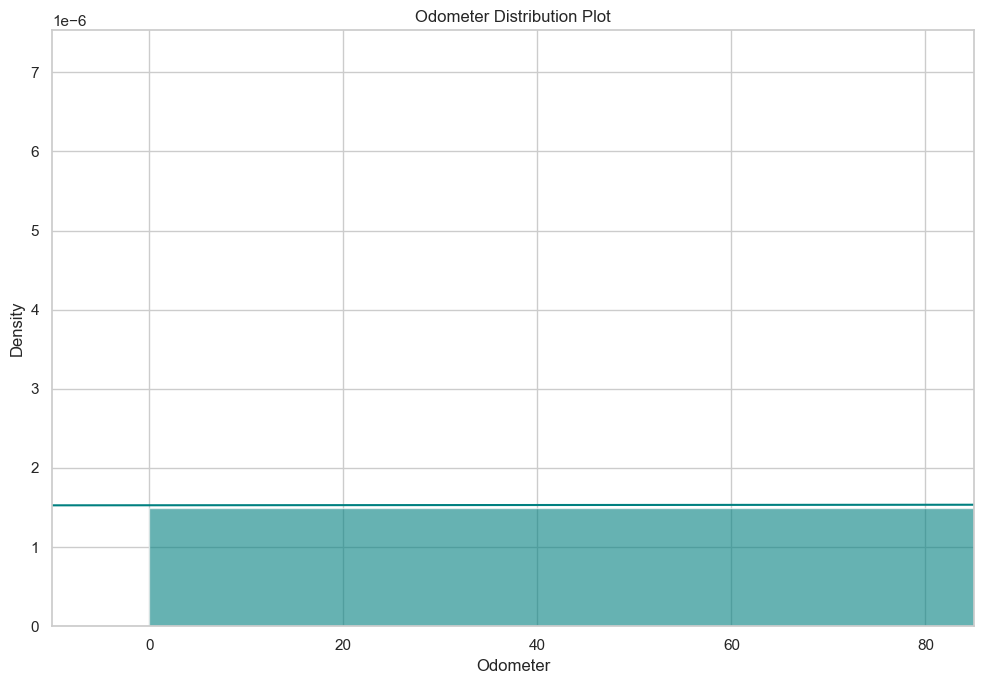

In [579]:
# Let's look at the data in Price Column and see the distribution of the values
fig, ax = plt.subplots(figsize=(10,7))
ax = data_copy["odometer"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data_copy["odometer"].plot(kind='density', color='teal')
ax.set_title('Odometer Distribution Plot')
ax.set(xlabel='Odometer')
plt.xlim(-10,85)
plt.show()

In [580]:
# Price and Odometer distribution plots do not tell us anything meaningful. I think this is due to the outliers
# or bad/unrealistic data in the dataset

In [581]:
# mean Odometer
print('The mean of "Odometer" is %.2f' %(data_copy["odometer"].mean(skipna=True)))
# median Odometer
print('The median of "Odometer" is %.2f' %(data_copy["odometer"].median(skipna=True)))

The mean of "Odometer" is 107399.09
The median of "Odometer" is 104000.00


In [582]:
# With 34,868 records, we have 81 records with zero odometers and 2,372 with zero dollars for price.
# We will remove these records 

In [583]:
# Removing records with zero for Odometer and Prices
# Remove rows with all 0s in a Dataframe
data_copy.drop(data_copy[data_copy['price'] == 0].index, inplace = True)
data_copy.drop(data_copy[data_copy['odometer'] == 0].index, inplace = True)
data_copy

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


In [584]:
# Quick check to ensure all rows do not include any zero values
s = data_copy.eq(0).any()
s

price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
dtype: bool

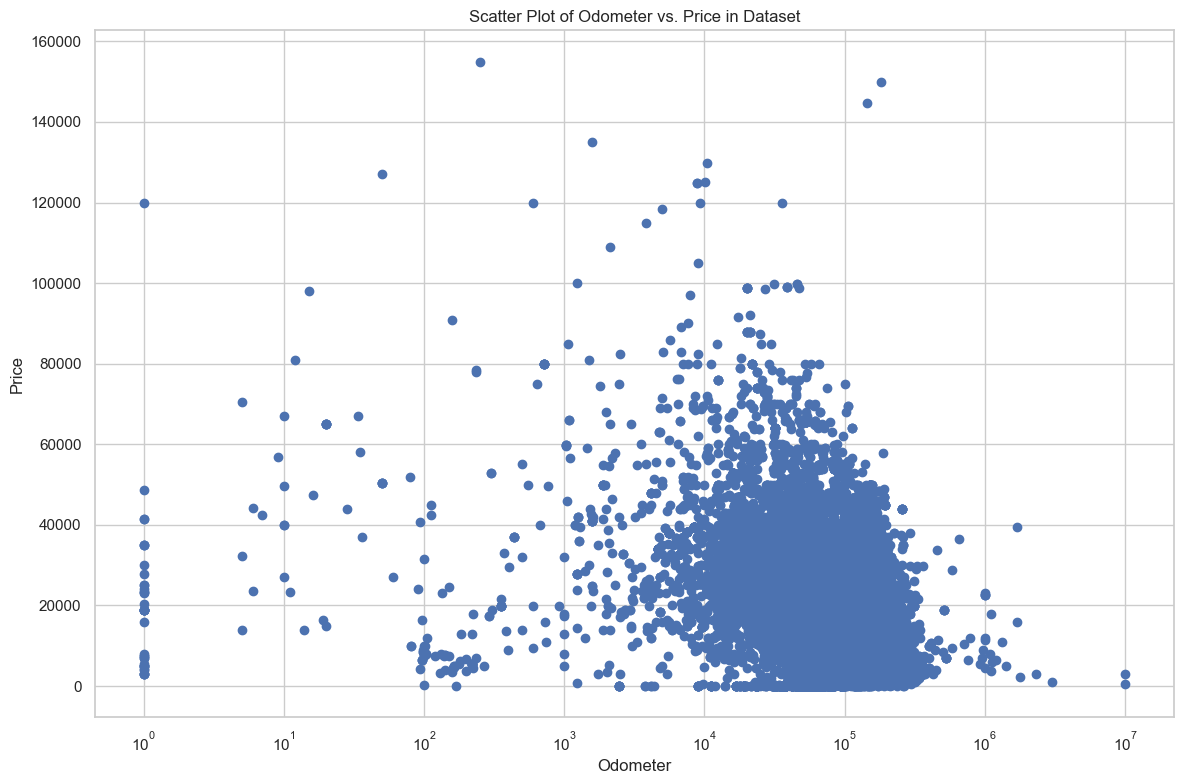

In [585]:
# Lets look at a scatter plot of the odometer and price to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
plt.xscale("log") 
ax.scatter(data_copy['odometer'], data_copy['price'])
# set a title and labels
ax.set_title('Scatter Plot of Odometer vs. Price in Dataset')
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
plt.show()

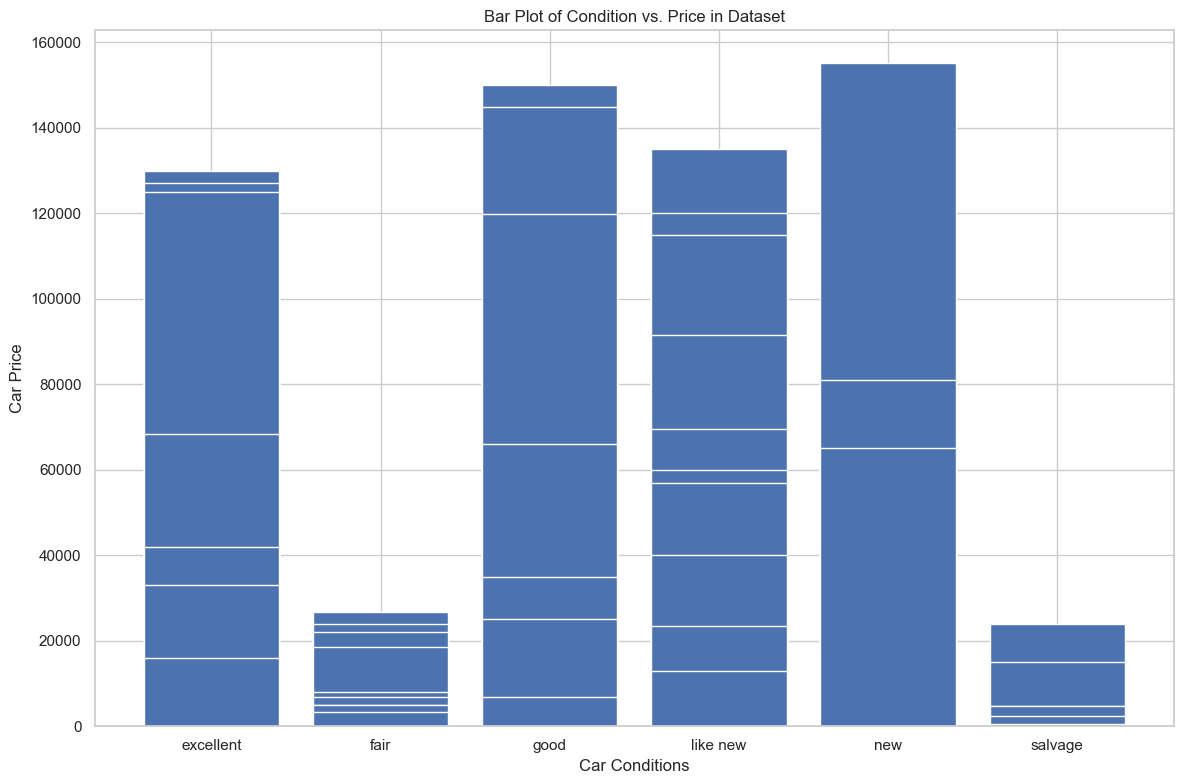

In [586]:
# Lets look at a scatter plot of the odometer and price to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data_copy["condition"],data_copy["price"])
# set a title and labels
ax.set_title('Bar Plot of Condition vs. Price in Dataset')
ax.set_xlabel('Car Conditions')
ax.set_ylabel('Car Price')
plt.show()

#plt.bar(data_copy["condition"],data_copy["price"])
#plt.show()

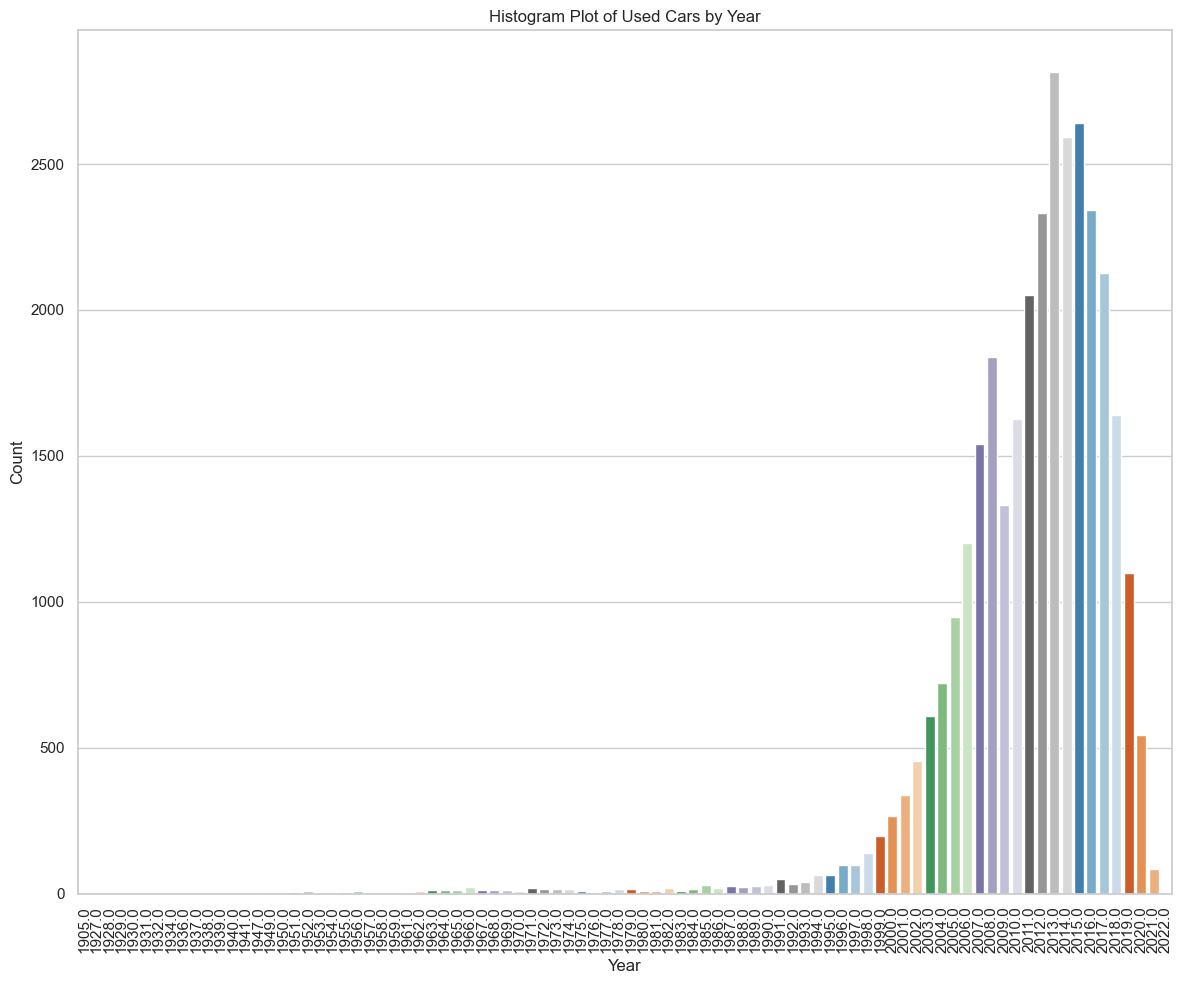

In [587]:
# Plot the number of used car counts by year

import seaborn as sns

# Create a palette with as many unique colors as needed
num_years = data_copy['year'].nunique()
palette = sns.color_palette('tab20c', num_years)  

fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='year', data=data_copy, ax=ax, palette=palette)

ax.set_title("Histogram Plot of Used Cars by Year")
plt.xticks(rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Count")

plt.show()

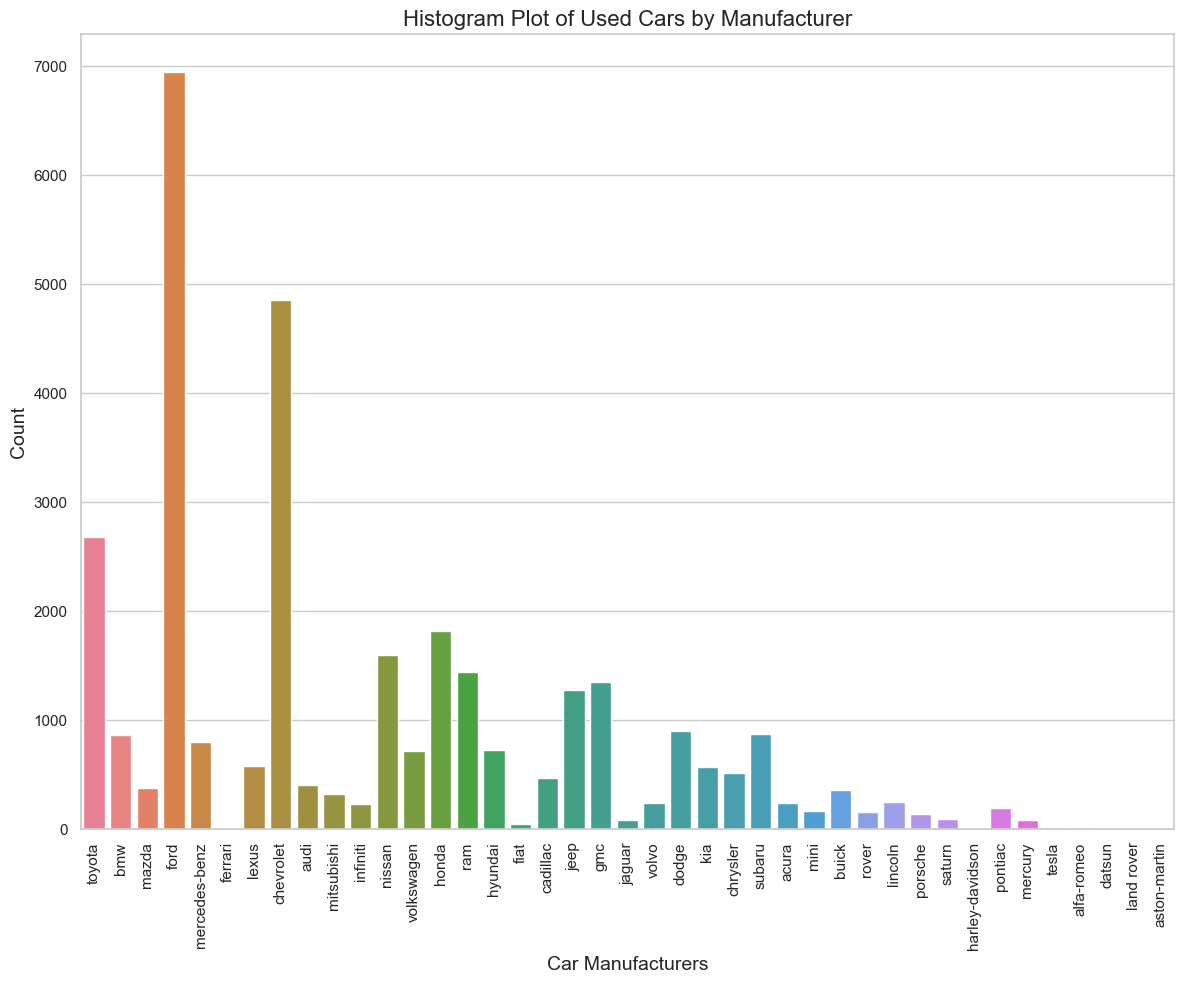

In [588]:
# Plot the number of used car counts by manufacturer

import matplotlib.pyplot as plt
import seaborn as sns

# Get unique manufacturer count
num_manufacturers = data_copy['manufacturer'].nunique()

# Create a palette with that many colors
palette = sns.color_palette("husl", num_manufacturers)  # or try "Set3", "Paired", etc.

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='manufacturer', data=data_copy, ax=ax, palette=palette)

# Add title and axis labels
ax.set_title("Histogram Plot of Used Cars by Manufacturer", fontsize=16)
ax.set_xlabel("Car Manufacturers", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

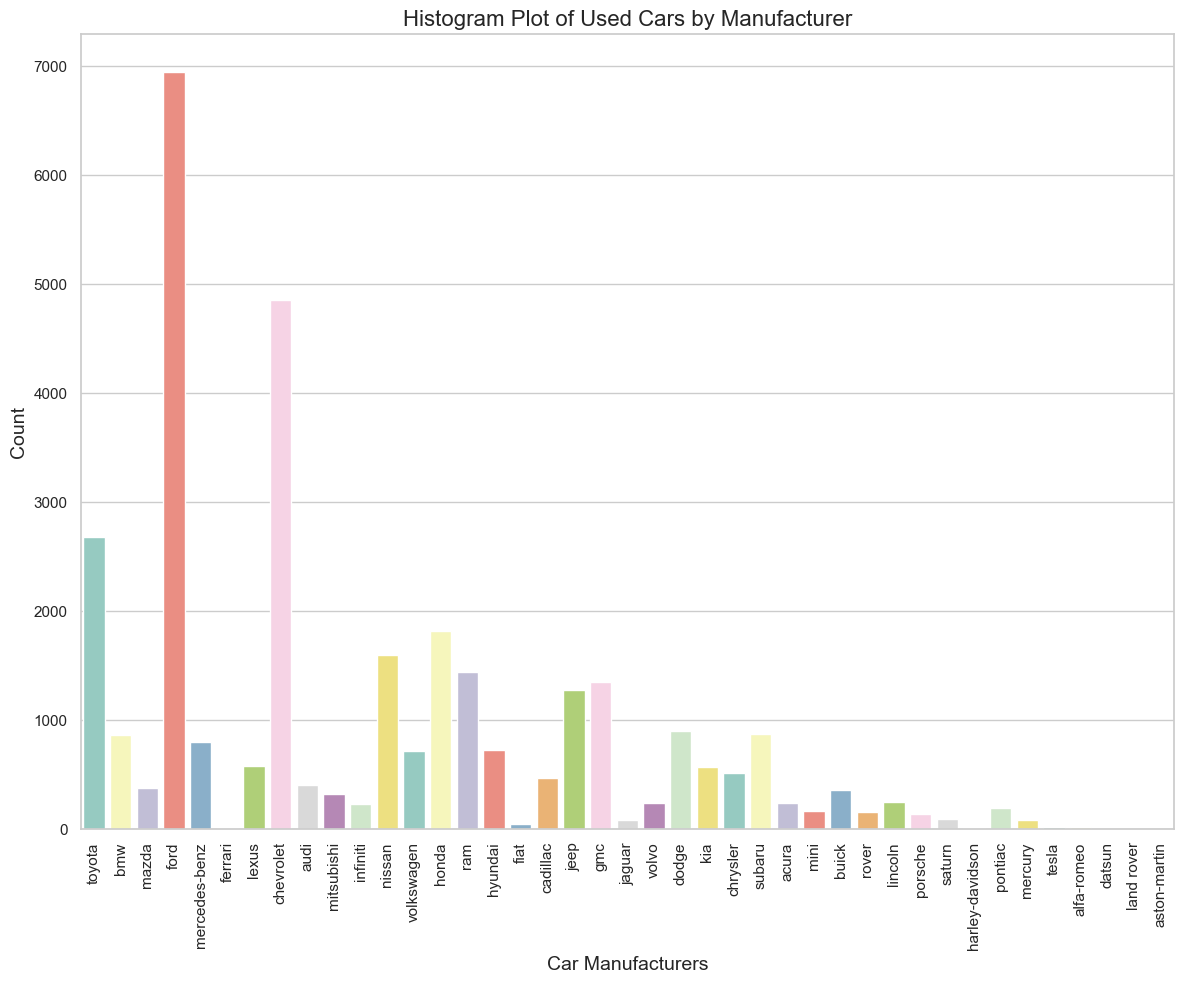

In [589]:
# From the chart above, you can see that the records from 1905 to 1990 were not extensive. You restrict the records in
# the model from 1991
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))

# Get number of unique manufacturers
num_manufacturers = data_copy['manufacturer'].nunique()

# Define a color palette with enough colors
palette = sns.color_palette("Set3", num_manufacturers)  # Try "husl", "Paired" if too many

# Create seaborn countplot with the color palette
sns.countplot(x='manufacturer', data=data_copy, ax=ax, palette=palette)

# Add title and axis labels
ax.set_title("Histogram Plot of Used Cars by Manufacturer", fontsize=16)
ax.set_xlabel("Car Manufacturers", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [590]:
# From the chart above, you can see that Ford, Chevrolet and Toyota are the top 3 manufacturers


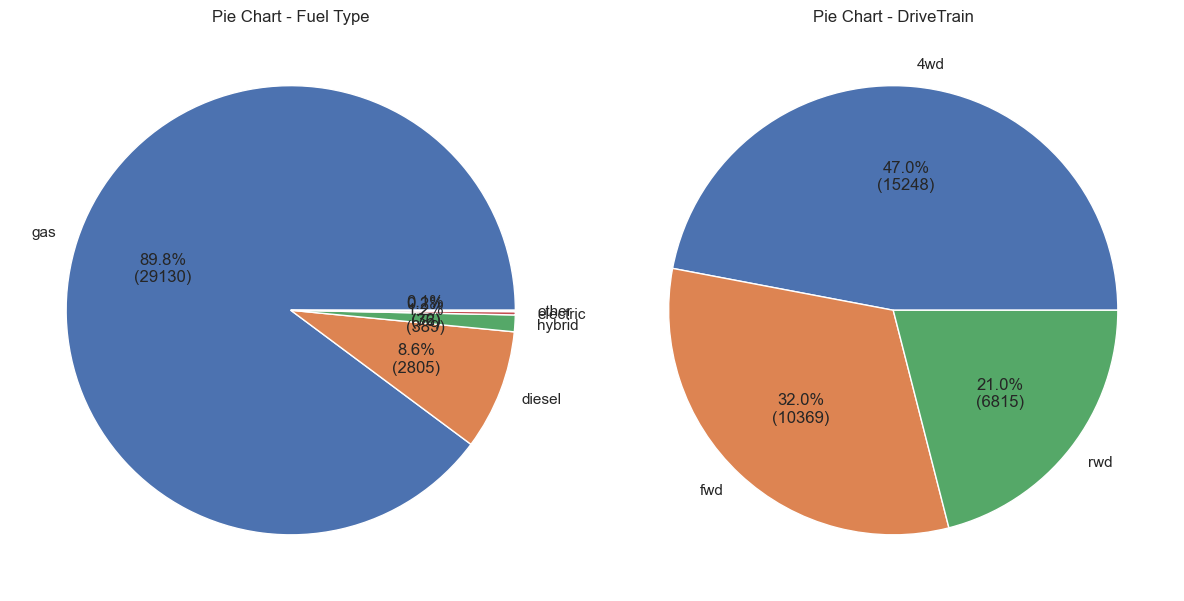

In [591]:
# Plot some pie charts to visualize the number of used cars based on car features
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


# create a figure with two subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

# plot each pie chart in a separate subplot

ax1.set_title('Pie Chart - Fuel Type')
s = data_copy['fuel'].value_counts()
ax1.pie(s,labels = s.index,  autopct=autopct_format(s))

ax2.set_title('Pie Chart - DriveTrain')
s = data_copy['drive'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))

plt.show()

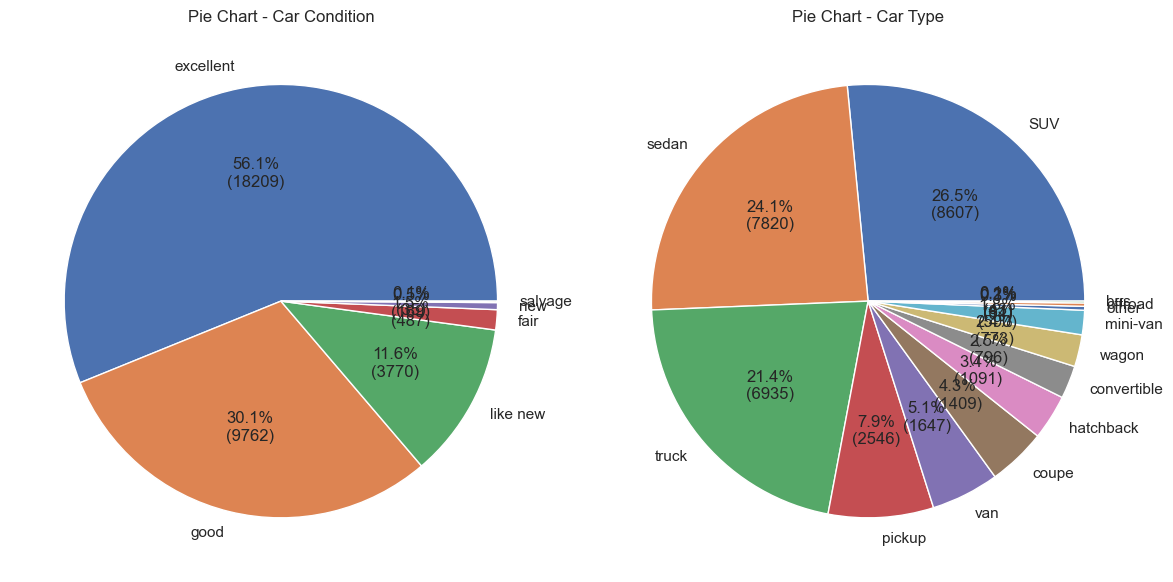

In [592]:
# create a figure with two subplots
#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

# plot each pie chart in a separate subplot

ax1.set_title('Pie Chart - Car Condition')
s = data_copy['condition'].value_counts()
ax1.pie(s,labels = s.index,  autopct=autopct_format(s))

ax2.set_title('Pie Chart - Car Type')
s = data_copy['type'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))


plt.show()

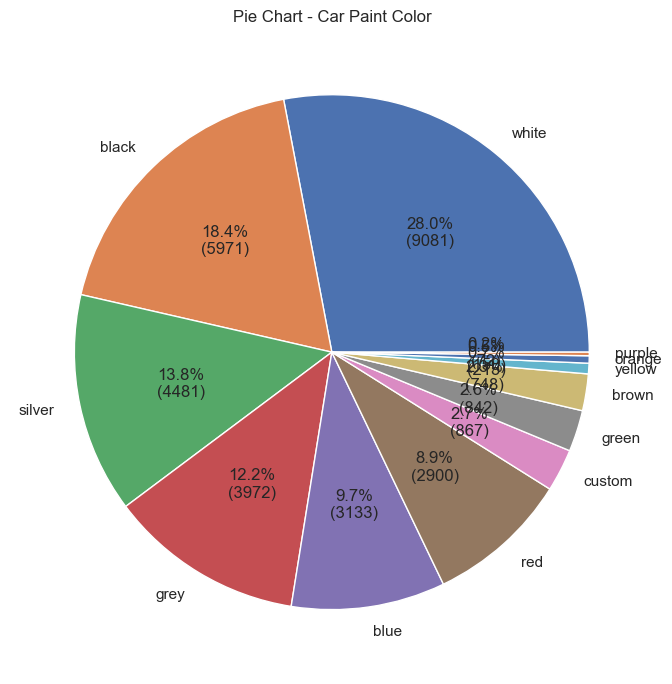

In [593]:
# create a figure with subplots
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,7))

# plot each pie chart in a separate subplot

ax.set_title('Pie Chart - Car Paint Color')
s = data_copy['paint_color'].value_counts()
ax.pie(s,labels = s.index, autopct=autopct_format(s))


plt.show()

In [594]:
#Lets look at the Correlation after some data manipulation
data_copy.select_dtypes(include='number').corr()

,price,year,odometer
price,1.000000,0.317258,-0.233163
year,0.317258,1.000000,-0.212234
odometer,-0.233163,-0.212234,1.000000


In [595]:
#The correlation between price, odometer and year is not strong. Only year has a positive value

In [596]:
#Lets review the uniqueness of the following features state, paint_color, manufacturer, model, cylinders,
#type, transmission and title_status

In [597]:
data_copy['state'].value_counts()

state
fl    3395
ca    3296
ny    1722
tx    1295
mi    1222
wi    1111
nc    1091
oh    1033
ia    1030
pa     999
or     984
va     978
tn     863
mn     792
nj     789
co     759
vt     676
ma     655
il     634
id     604
az     599
ks     599
in     565
ky     543
ok     500
sc     449
al     419
ak     403
mo     381
mt     348
wa     312
ct     298
ga     270
nm     238
ri     230
nv     221
hi     207
me     197
nh     192
dc     182
md     161
ut     153
sd     149
ar     145
ne     134
nd     133
la     130
de     109
wv      88
wy      87
ms      62
Name: count, dtype: int64

In [598]:
data_copy['paint_color'].value_counts()

paint_color
white     9081
black     5971
silver    4481
grey      3972
blue      3133
red       2900
custom     867
green      842
brown      748
yellow     215
orange     150
purple      72
Name: count, dtype: int64

In [599]:
data_copy['manufacturer'].value_counts

<bound method IndexOpsMixin.value_counts of 215              toyota
219                 bmw
268               mazda
337                ford
338       mercedes-benz
              ...      
426785             ford
426788        chevrolet
426792             ford
426793        chevrolet
426833           jaguar
Name: manufacturer, Length: 32432, dtype: object>

In [600]:
data_copy['model'].value_counts()

model
f-150                     812
silverado 1500            771
1500                      408
2500                      267
silverado 2500hd          255
                         ... 
rondo ex                    1
sentra special edition      1
2500 st                     1
g37 x awd                   1
cruze, 2lt                  1
Name: count, Length: 4943, dtype: int64

In [601]:
data_copy['cylinders'].value_counts()

cylinders
6 cylinders     10773
4 cylinders     10655
8 cylinders     10017
10 cylinders      548
5 cylinders       270
other              92
3 cylinders        66
12 cylinders       11
Name: count, dtype: int64

In [602]:
data_copy['transmission'].value_counts()

transmission
automatic    30093
manual        1645
other          694
Name: count, dtype: int64

In [603]:
data_copy['title_status'].value_counts()

title_status
clean         31258
rebuilt         786
salvage         239
lien            134
missing          14
parts only        1
Name: count, dtype: int64

### Based on the data for these features, we can drop these features due to the following:

. state has a lot of options and this feature should not have a big impact on price

. paint_color has a number of unique values with white being the most dominant. .Should not have a big impact on price

. manufacturer is varied with ford with the most number of vehicles

. model has 4943 and should not have a big impact on price

. cylinders should not have a big impact on price

. type should not have a big impact on price

. transmission is mainly automatic so we can drop

. title_status can be dropped, we have condition field


In [605]:
# Remove these features above from the datasets state, paint_color, manufacturer, model, cylinders,
# type, transmission and title_status

data_copy.drop(['state', 'paint_color', 'manufacturer', 'model', 'cylinders', 'type', 'transmission', 'title_status'], axis=1,  inplace=True)
data_copy.head(5)

,price,year,condition,fuel,odometer,drive,size
215,4000,2002.0,excellent,gas,155000.0,fwd,compact
219,2500,1995.0,fair,gas,110661.0,rwd,mid-size
268,9000,2008.0,excellent,gas,56700.0,rwd,compact
337,8950,2011.0,excellent,gas,164000.0,fwd,full-size
338,4000,1972.0,fair,gas,88100.0,rwd,full-size


In [606]:
# Let's reviwed the unique values for the features that we are planning to keep for the model

In [607]:
data_copy['condition'].value_counts()

condition
excellent    18209
good          9762
like new      3770
fair           487
new            169
salvage         35
Name: count, dtype: int64

In [608]:
data_copy['fuel'].value_counts()

fuel
gas         29130
diesel       2805
hybrid        389
electric       76
other          32
Name: count, dtype: int64

In [609]:
data_copy['size'].value_counts()

size
full-size      19118
mid-size        8920
compact         3809
sub-compact      585
Name: count, dtype: int64

In [610]:
data_copy['drive'].value_counts()

drive
4wd    15248
fwd    10369
rwd     6815
Name: count, dtype: int64

### 

These features do not have that many unique values with the number of unique values ranging from 3 to 6 We may decide to add "paint_color" depending on the model and results of the linear regression models

In [612]:
#create categorical variables and drop some variables
model_data_df=pd.get_dummies(data_copy, columns=["condition","fuel","size", "drive"])
model_data_df.head()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
215,4000,2002.0,155000.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
219,2500,1995.0,110661.0,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
268,9000,2008.0,56700.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
337,8950,2011.0,164000.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
338,4000,1972.0,88100.0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True


In [613]:
model_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32432 entries, 215 to 426833
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                32432 non-null  int64  
 1   year                 32432 non-null  float64
 2   odometer             32432 non-null  float64
 3   condition_excellent  32432 non-null  bool   
 4   condition_fair       32432 non-null  bool   
 5   condition_good       32432 non-null  bool   
 6   condition_like new   32432 non-null  bool   
 7   condition_new        32432 non-null  bool   
 8   condition_salvage    32432 non-null  bool   
 9   fuel_diesel          32432 non-null  bool   
 10  fuel_electric        32432 non-null  bool   
 11  fuel_gas             32432 non-null  bool   
 12  fuel_hybrid          32432 non-null  bool   
 13  fuel_other           32432 non-null  bool   
 14  size_compact         32432 non-null  bool   
 15  size_full-size       32432 non-null  b

In [614]:
# Check if there is still bad data in the data set, i.e., unrealistic values in the attributes
s = model_data_df.eq(1).any()
s

price                   True
year                   False
odometer                True
condition_excellent     True
condition_fair          True
condition_good          True
condition_like new      True
condition_new           True
condition_salvage       True
fuel_diesel             True
fuel_electric           True
fuel_gas                True
fuel_hybrid             True
fuel_other              True
size_compact            True
size_full-size          True
size_mid-size           True
size_sub-compact        True
drive_4wd               True
drive_fwd               True
drive_rwd               True
dtype: bool

In [615]:
# The check for a value of "one" reveals that Price and Odometer have a value of one. 
# Obviously value of "one" for price and odometer is not realistic for used cars

In [616]:
#Let's look at the correlation for the final dataset
model_data_df.corr()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
price,1.000000,0.317258,-0.233163,-0.024179,-0.117517,-0.055432,0.147255,0.076584,-0.030312,0.420564,0.020550,-0.379040,-0.038859,-0.011298,-0.196132,0.307108,-0.178640,-0.061325,0.294039,-0.372592,0.066291
year,0.317258,1.000000,-0.212234,0.081343,-0.166194,-0.144118,0.134789,0.044497,-0.013736,0.025427,0.030977,-0.034400,0.020805,-0.016149,0.013967,0.005844,-0.012437,-0.013661,0.134664,0.038940,-0.209552
odometer,-0.233163,-0.212234,1.000000,-0.033959,0.117778,0.091095,-0.117267,-0.036769,0.029717,0.046102,-0.028453,-0.037938,-0.003167,0.007467,-0.056646,0.066543,-0.030012,-0.008237,0.017157,-0.008741,-0.011012
condition_excellent,-0.024179,0.081343,-0.033959,1.000000,-0.139705,-0.742491,-0.410360,-0.081891,-0.037190,-0.032248,-0.013713,0.027311,0.011756,0.006004,0.066284,-0.090548,0.039500,0.041811,0.047806,0.031752,-0.094915
condition_fair,-0.117517,-0.166194,0.117778,-0.139705,1.000000,-0.081023,-0.044780,-0.008936,-0.004058,-0.017246,-0.005984,0.015580,0.000370,0.012270,0.011658,-0.021170,0.017066,-0.007209,-0.023857,0.013753,0.013483
condition_good,-0.055432,-0.144118,0.091095,-0.742491,-0.081023,1.000000,-0.237991,-0.047494,-0.021569,0.048475,-0.015120,-0.031143,-0.030312,-0.005635,-0.078194,0.110753,-0.056740,-0.029843,-0.027426,-0.060258,0.102579
condition_like new,0.147255,0.134789,-0.117267,-0.410360,-0.044780,-0.237991,1.000000,-0.026249,-0.011921,-0.011315,0.046090,-0.002916,0.018365,-0.005270,0.001861,-0.007106,0.013166,-0.022409,-0.027076,0.029430,-0.000519
condition_new,0.076584,0.044497,-0.036769,-0.081891,-0.008936,-0.047494,-0.026249,1.000000,-0.002379,-0.003987,-0.003508,-0.005372,0.027432,-0.002275,0.008183,-0.007506,-0.001421,0.012716,0.007331,0.007317,-0.017358
condition_salvage,-0.030312,-0.013736,0.029717,-0.037190,-0.004058,-0.021569,-0.011921,-0.002379,1.000000,-0.006773,-0.001593,0.004855,0.005005,-0.001033,0.011345,-0.014569,0.007095,0.002601,-0.002738,0.007672,-0.005428
fuel_diesel,0.420564,0.025427,0.046102,-0.032248,-0.017246,0.048475,-0.011315,-0.003987,-0.006773,1.000000,-0.014913,-0.913912,-0.033902,-0.009670,-0.107135,0.237822,-0.172572,-0.040879,0.174996,-0.190712,0.003926


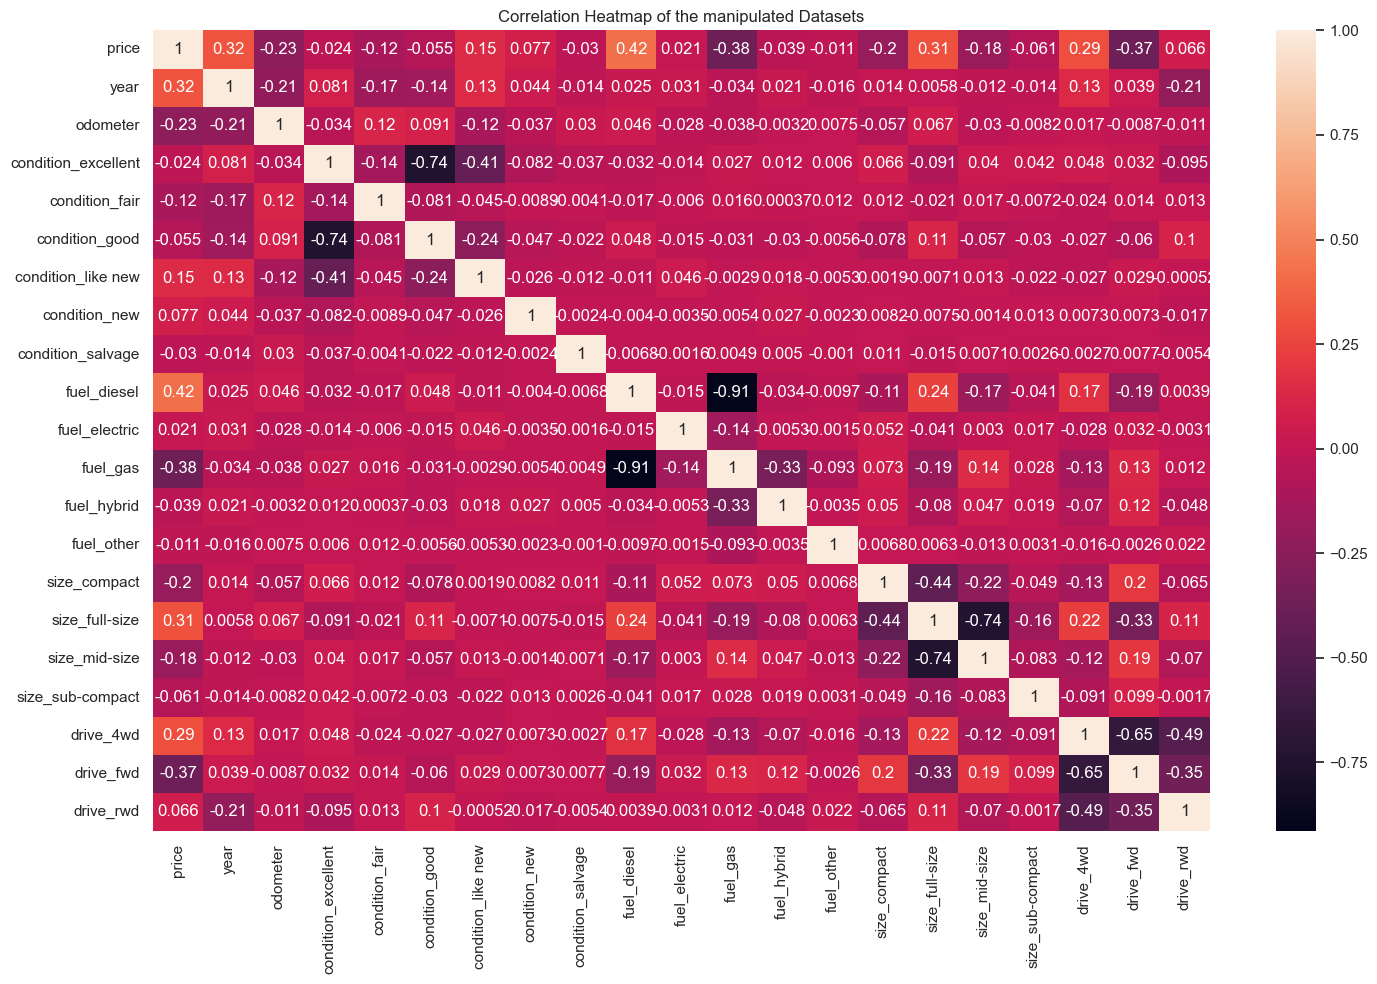

In [617]:
# Now lets look at the heatmap for the final data set

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(model_data_df.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the manipulated Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

### Corrrelation Review

There are some strong correlation between fuel_gas and fuel_diesel, but this is not related to price. Strongest correlation after creating categorical variables is fuel_diesel with price Looking at price, most of the values are negative, the only positive ones are year, condition_like new, fuel_diesel, size_full-size and drive_4wd. The strongest correlation to price is fuel_diesel. Although they are positive numbers, they are not strong correlations that should be considered for removal as the value is less than 0.85

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Create a number of ML Models (i.e., ML Applications) using Linear Regression that could be used to predict Car Prices.

Model application will be created using the full set of features (i.e.,year,condition,fuel,odometer,drive and size) in the final dataset

In [620]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict car prices
X = model_data_df.drop(['price'], axis = 1)
y = model_data_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [621]:
#First, we create a new model object. Using fit intercept = false sets the y-intercept to 0.
model=LinearRegression(fit_intercept=False)

In [622]:
# With model created, let's fit the model using the manipulated datasets
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [623]:
# Fitted model can now be used to examine the estimated coefficients and also predict ths value of the dependent
# for a given set of independent variables which in this model is the manipulated dataset
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [ 4.46704324e+02 -3.09688337e-02 -1.54338713e+05 -1.58651264e+05
 -1.55233917e+05 -1.50690552e+05 -1.41934204e+05 -1.61738600e+05
 -1.72819894e+05 -1.83178464e+05 -1.88680426e+05 -1.87593282e+05
 -1.90315183e+05 -2.33513277e+05 -2.27308162e+05 -2.30570934e+05
 -2.31194877e+05 -3.05095947e+05 -3.12652620e+05 -3.04838683e+05]
Intercept of the model:  0.0


In [624]:
# get the cofficients
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]

[('year', 446.70432446088745),
 ('odometer', -0.030968833659875017),
 ('condition_excellent', -154338.71260567982),
 ('condition_fair', -158651.263527352),
 ('condition_good', -155233.91745014954),
 ('condition_like new', -150690.5519275711),
 ('condition_new', -141934.2038388255),
 ('condition_salvage', -161738.59994306858),
 ('fuel_diesel', -172819.8938903951),
 ('fuel_electric', -183178.46426226012),
 ('fuel_gas', -188680.42586242835),
 ('fuel_hybrid', -187593.28213744066),
 ('fuel_other', -190315.18314012192),
 ('size_compact', -233513.27694948588),
 ('size_full-size', -227308.16170012904),
 ('size_mid-size', -230570.93408284071),
 ('size_sub-compact', -231194.87656018574),
 ('drive_4wd', -305095.9465458514),
 ('drive_fwd', -312652.62002822664),
 ('drive_rwd', -304838.6827184659)]

In [625]:
#Let compute the predictions for the entire set of inputs
train_predictions=model.predict(X_train)
train_predictions

array([18582.98161611,  8207.71147576, 16212.89413723, ...,
        7693.37587238,  4556.62711211, 16546.25253369])

In [626]:
#Compute Accuracy and RMSE to training model
score = model.score(X_train, y_train)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_train,train_predictions)), 2))

Accuracy:  44.54
RMSE:      9846.1


In [627]:
# The score of the training model is not strong with .44 score. This may be due to bad data, unrealistic data
# i.e., odometer and price with a value of 1

In [628]:
# Using the model to make predictions of Price on the test set:
test_predictions=model.predict(X_test)

In [629]:
# Compute Accuracy and RMSE to test model
score = model.score(X_test, y_test)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,test_predictions)), 2))

Accuracy:  43.09
RMSE:      9941.12


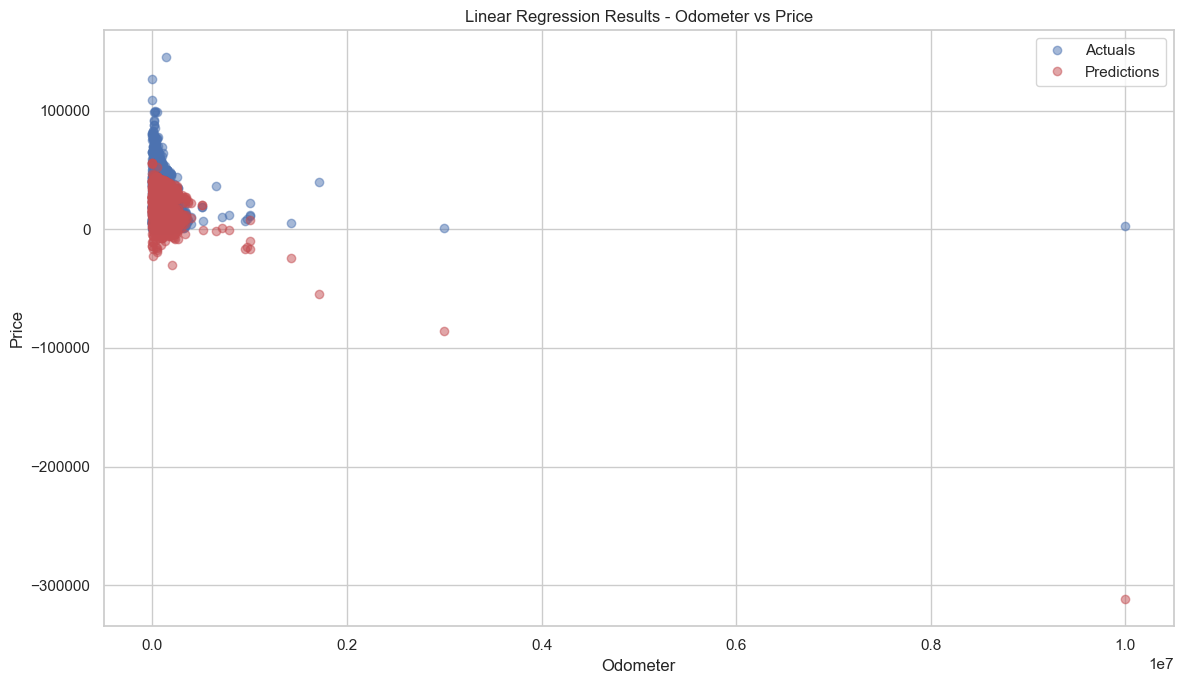

In [630]:
# Visualization of how well the model did by plotting the actual and predicted values
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(X_test.odometer, y_test, 'ob', label='Actuals', alpha=0.5)
ax.plot(X_test.odometer, test_predictions, 'or', label='Predictions', alpha=0.5)
ax.set(xlabel='Odometer', ylabel='Price')
ax.legend()
ax.set_title('Linear Regression Results - Odometer vs Price')
plt.show()

In [631]:
# This visualization of the Linear regression results is not good with negative predictions for Price.

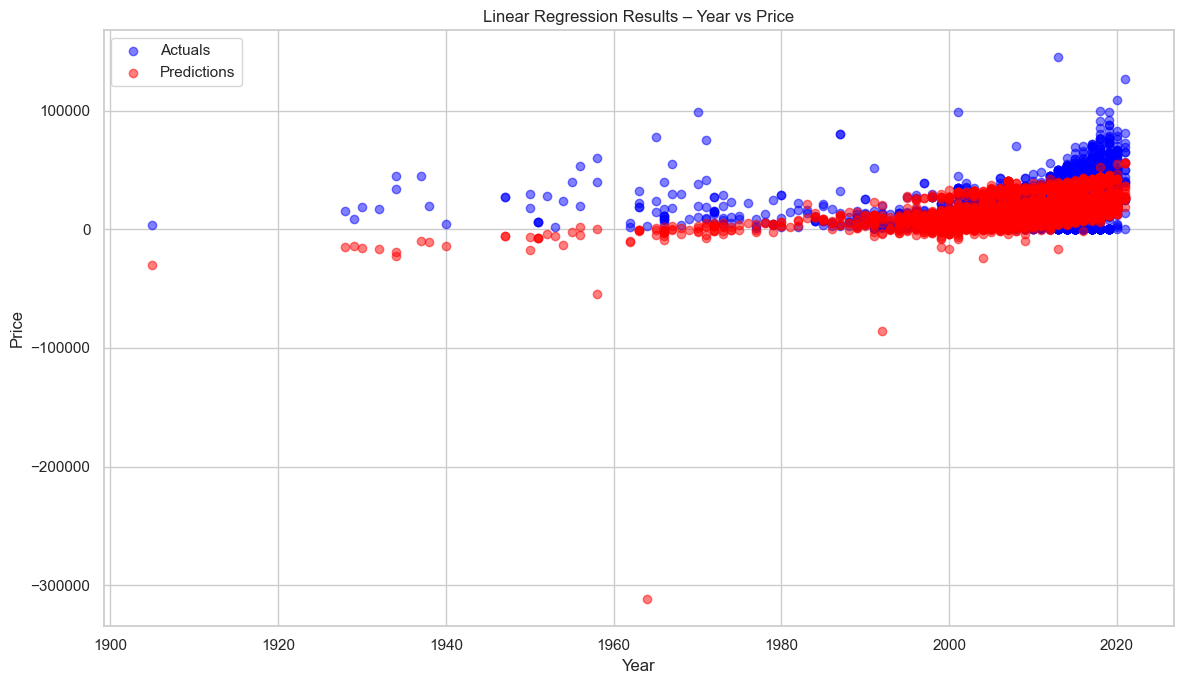

In [632]:
# Visualization of how well the model did by plotting the actual and predicted values
plt.close('all')
# Create the plot
fig, axes = plt.subplots(1, 1, figsize=(12, 7))

# Scatter actual prices
axes.scatter(X_test.year, y_test, color='blue', alpha=0.5, label='Actuals')

# Scatter predicted prices
axes.scatter(X_test.year, test_predictions, color='red', alpha=0.5, label='Predictions')

# Labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results – Year vs Price')
axes.legend()

plt.tight_layout()
plt.show()

In [633]:
# This visualization of the Linear regression results is not good with negative predictions for Price

In [634]:
# Check the correlation to see if the model tracks the relationship between independent and dependent features
np.corrcoef(y_test, test_predictions) [0][1]

0.6586628004709668

In [635]:
# With a number of 0.65 for correlation coefficiency and 43.09 for accuracy, this shows that the 
# predictions are not strongly correlated

In [636]:
#Prediction using all input values as parameters

#First Example, new car with 100 miles, condition excellent and new with diesel and four wheel drive
new_car_with_all_strong_features = [[2022,100,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0]]
print("New car with 100 miles, condition excellent and new with diesel and four wheel drive: ", model.predict(new_car_with_all_strong_features))

#Second Example, new car with 100 miles, condition good and with Electric and front wheel drive
new_ev_car_with_some_features = [[2022,100,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0]]
print("New car with 100 miles, condition good and with Electric and front wheel drive ", model.predict(new_ev_car_with_some_features))

New car with 100 miles, condition excellent and new with diesel and four wheel drive:  [-98263.87140433]
New car with 100 miles, condition good and with Electric and front wheel drive  [29013.33885829]


In [637]:
## Issue with outliers and bad data if a new 2022 car with 100 miles is priced at -$98,263 and a new 2022 EV car is 
## priced at $29,013

### Lets run the Regression Model using a selected number of features only

Model1 application will be created using odometer and year in the final dataset

In [639]:
# Run Regression using Odometer and Year for Price Prediction
X1 = model_data_df[['odometer', 'year']]
y1 = model_data_df.price
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
model1=LinearRegression(fit_intercept=False)
model1.fit(X1_train, y1_train)
print("Coefficient of the model: ",model1.coef_)
print("Intercept of the model: ", model1.intercept_)

Coefficient of the model:  [-0.03699603 10.44305147]
Intercept of the model:  0.0


In [640]:
# get the cofficients
[(col, coef) for col, coef in zip (X1_train.columns, model1.coef_)]

[('odometer', -0.0369960341290061), ('year', 10.443051473587191)]

In [641]:
#Let compute the predictions for the entire set of inputs
train1_predictions=model1.predict(X1_train)
train1_predictions

array([17897.98500006, 15852.21161747, 15868.32803513, ...,
       17706.36219961, 16074.96473896, 15720.33372877])

In [642]:
#Compute Accuracy and RMSE to training model
score1 = model1.score(X1_train, y1_train)
print("Accuracy: ", round(score1*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y1_train,train1_predictions)), 2))

Accuracy:  6.94
RMSE:      12753.69


In [643]:
# Using the model to make predictions of Price on the test set:
test1_predictions=model1.predict(X1_test)

In [644]:
# Compute Accuracy and RMSE to test model
score1 = model1.score(X1_test, y1_test)
print("Accuracy: ", round(score1*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y_test,test_predictions)), 2))

Accuracy:  1.92
RMSE:      9941.12


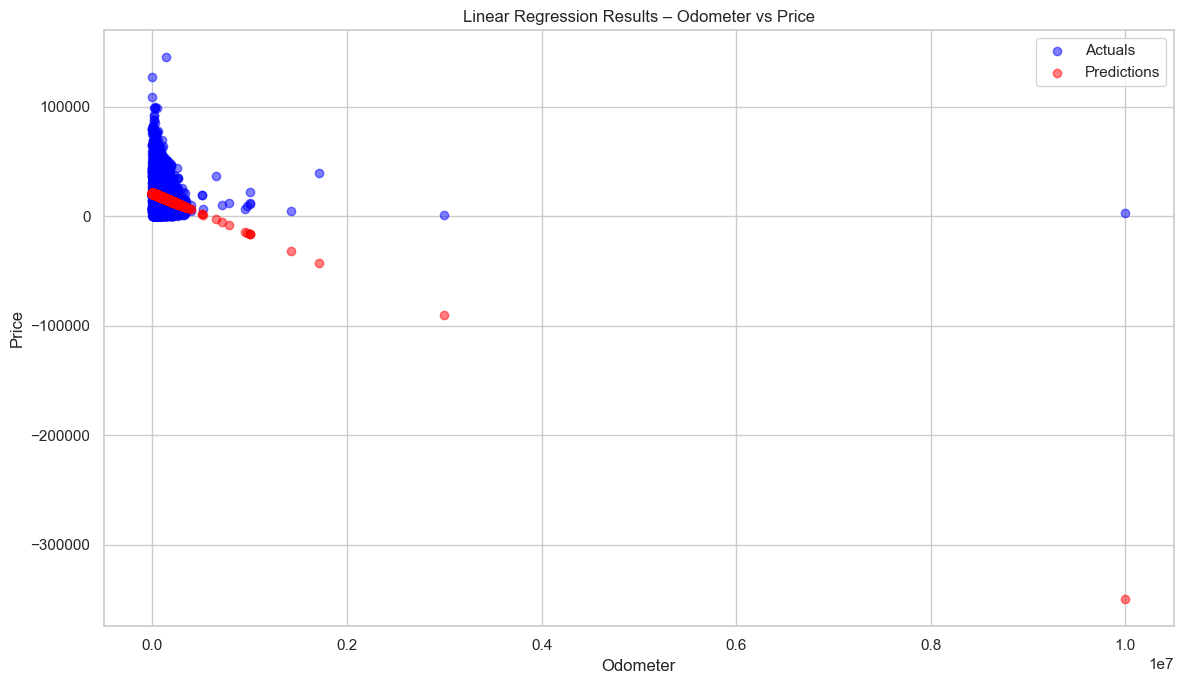

In [645]:
# Visualization of how well the model did by plotting the actual and predicted values
import matplotlib.pyplot as plt
plt.close('all')
# Create figure and axes
fig, axes = plt.subplots(1, 1, figsize=(12, 7))

# Scatter plot for actual values
axes.scatter(X1_test.odometer, y1_test, color='blue', alpha=0.5, label='Actuals')

# Scatter plot for predicted values
axes.scatter(X1_test.odometer, test1_predictions, color='red', alpha=0.5, label='Predictions')

# Set labels and title
axes.set_xlabel('Odometer')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results – Odometer vs Price')

# Add legend
axes.legend()

# Display the plot
plt.tight_layout()
plt.show()

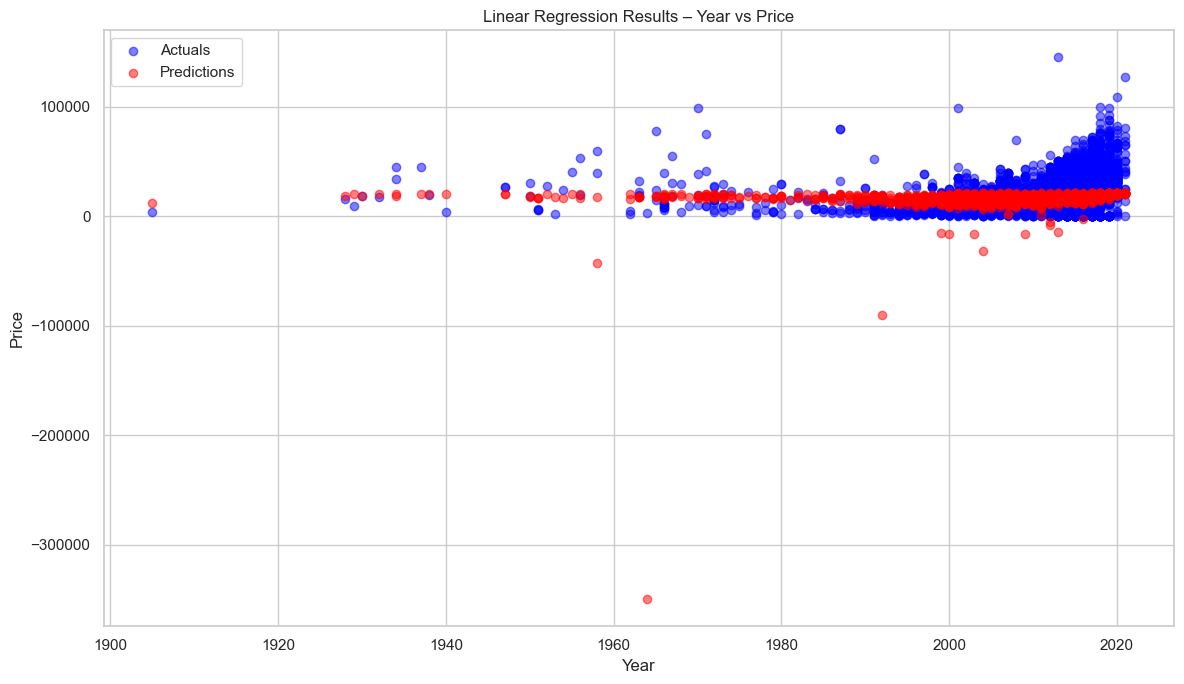

In [646]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, axes = plt.subplots(1, 1, figsize=(12, 7))

# Scatter plot of actual prices
axes.scatter(X1_test.year, y1_test, color='blue', alpha=0.5, label='Actuals')

# Scatter plot of predicted prices
axes.scatter(X1_test.year, test1_predictions, color='red', alpha=0.5, label='Predictions')

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results – Year vs Price')

# Add legend
axes.legend()

# Final layout and display
plt.tight_layout()
plt.show()

The linear regression model results do not produce a model that can be used for Price Prediction. I could look at some of the other categorical variables like condition, fuel, size etc, but I suspect that the result could be the same because of the bad data for Price.

Let's evaluate using mean and median of the Odometer and Price to see if we can updates these values

In [648]:
#Prediction using all input values as parameters

#First Example, new car with 100 miles with Year of 2022
new_car_2022 = [[100,2022]]
print("New car with 100 miles: ", model1.predict(new_car_2022))

#Second Example, old car with 90000 miles with year of 2001
old_car_2001 = [[90000,2001]]
print("Old 2001 car with 90000 miles: ", model1.predict(old_car_2001))

New car with 100 miles:  [21112.15047618]
Old 2001 car with 90000 miles:  [17566.90292704]


In [649]:
# Use a loop to build models of degree 1 through 7 on X_train with y1_train as the target. 
# Evaluate the mean_squared_error on the training data and the testing data and save these values as the lists train_mses and test_mses respectively. 
# Determine the model complexity that minimizes the mean_squared_error on the test  data, and assign this as an integer to best_model_complexity below.

train1_mses = []
test1_mses = []
best_model_complexity1 = ''

for i in range(1, 7):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X1_train, y1_train)
    train1_preds = pipe.predict(X1_train)
    test1_preds = pipe.predict(X1_test)
    train1_mses.append(mean_squared_error(y1_train, train1_preds))
    test1_mses.append(mean_squared_error(y1_test, test1_preds))
    
best_model_complexity1 = test1_mses.index(min(test1_mses)) + 1

print(len(train1_mses))
print(np.round(train1_mses, 2))
print(len(test1_mses))
print(np.round(test1_mses, 2))
print(best_model_complexity1)

6
[1.51171769e+08 1.29280259e+08 1.38196852e+08 1.35527990e+08
 1.42654209e+08 1.69846673e+08]
6
[1.54860845e+08 1.32683199e+08 8.38242532e+08 8.35735519e+11
 2.71602646e+12 2.93840437e+14]
2


The Complexity that minimized Test Error was: 2
The minimal MSE was: 132683199.33


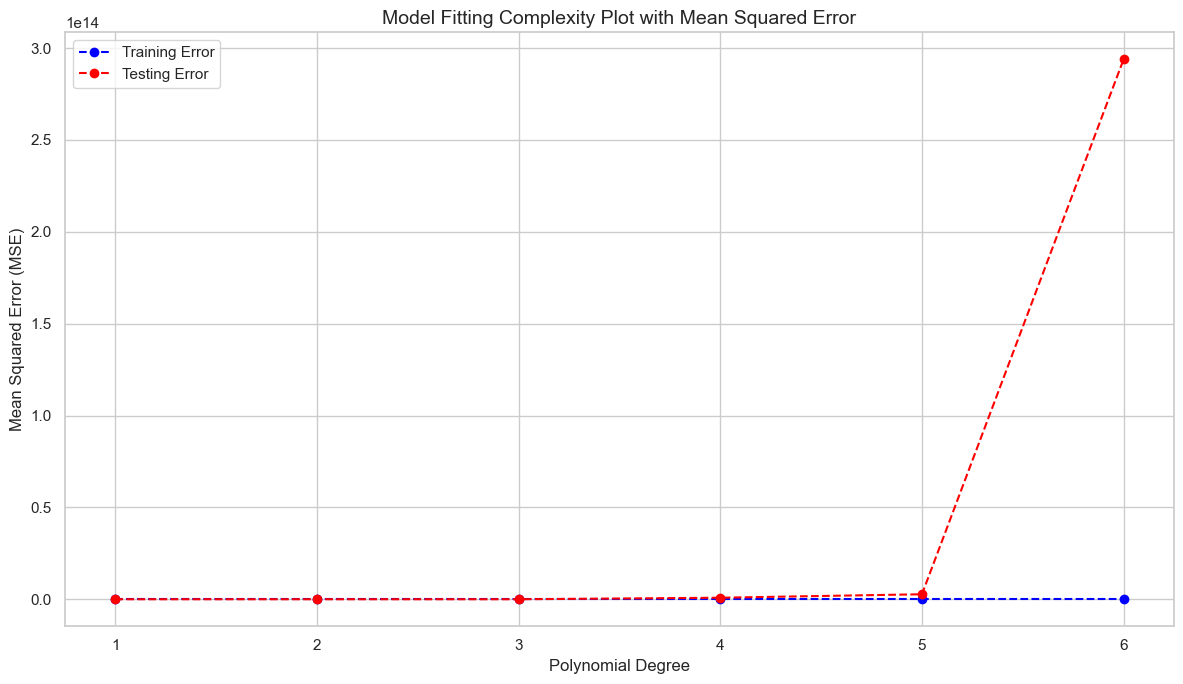

In [650]:
import matplotlib.pyplot as plt
plt.close('all')

# Display which degree minimized the test error
print(f'The Complexity that minimized Test Error was: {test1_mses.index(min(test1_mses)) + 1}')
print(f'The minimal MSE was: {min(test1_mses):.2f}')

# Plot the training and testing errors vs. model complexity (degree)
plt.figure(figsize=(12, 7))
plt.title('Model Fitting Complexity Plot with Mean Squared Error', fontsize=14)
plt.plot(range(1, 7), train1_mses, '--o', label='Training Error', color='blue')
plt.plot(range(1, 7), test1_mses, '--o', label='Testing Error', color='red')
plt.xticks(range(1, 7))
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [651]:
#Use the sklearn.inspection modules implementation of permutation_
# importance to investigate the importance of different features to your regression models

modelR = Ridge(alpha=1e-2).fit(X1_train, y1_train)
modelR.score(X1_test, y1_test)

0.10815754698101976

In [652]:
#  permutation_importance function to probe which features are most predictive
r = permutation_importance(modelR, X1_test, y1_test, n_repeats=30, random_state=0)

In [653]:
# mean values for permutation_importance
perm_df = pd.Series(r.importances_mean, index=X1_test.columns).sort_values(ascending=False)
perm_df

year        0.148678
odometer    0.072991
dtype: float64

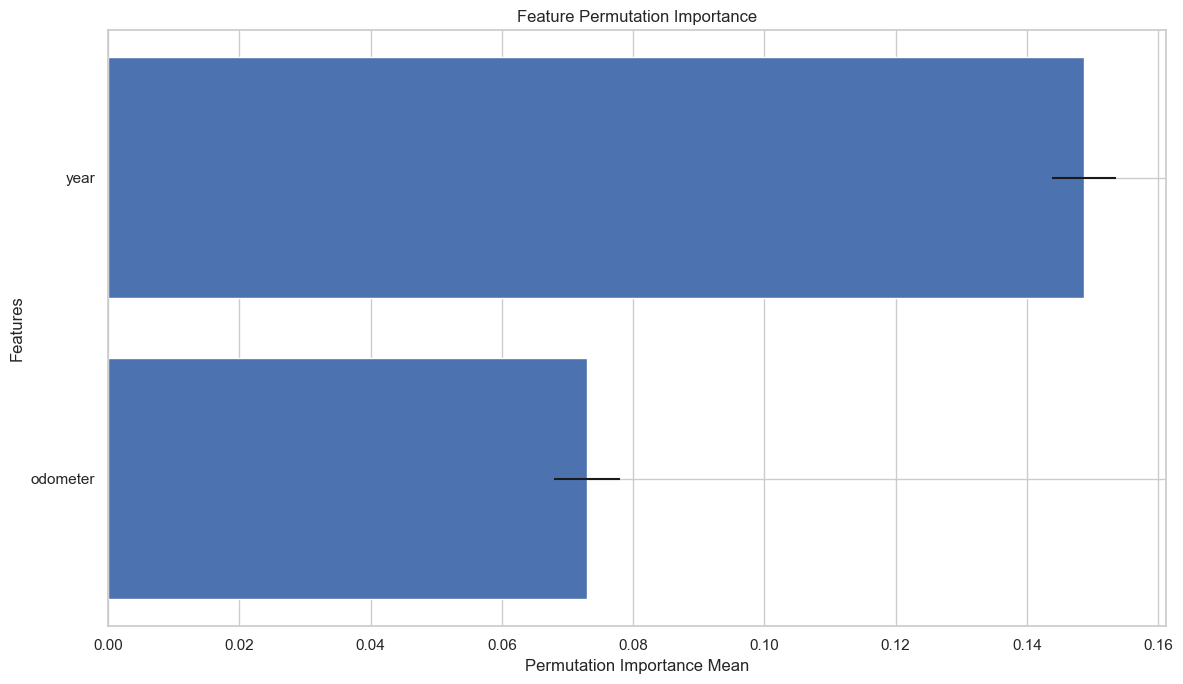

In [654]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
# Calculate permutation importance
r = permutation_importance(modelR, X1_test, y1_test, n_repeats=30, random_state=0)

# Create a DataFrame for plotting
perm_df = pd.DataFrame({
    'feature': X1_test.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
plt.barh(perm_df['feature'], perm_df['importance_mean'], xerr=perm_df['importance_std'])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Feature Permutation Importance")
plt.xlabel("Permutation Importance Mean")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Looking a the Bar Plot, year is more important than odometer. Also all the models was built using LinearRegression(fit_intercept=False) so that the fit_intercept=False sets the y-intercept to 0, i.e., the intercept is forced to the origin (0, 0).

Using fit_intercept=False provided predictions that minimized the number

In [656]:
# Copy the data
new_car_data_df = model_data_df.copy()
new_car_data_df

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
215,4000,2002.0,155000.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
219,2500,1995.0,110661.0,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
268,9000,2008.0,56700.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
337,8950,2011.0,164000.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
338,4000,1972.0,88100.0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,146795.0,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False
426788,12995,2016.0,61127.0,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
426792,32999,2014.0,154642.0,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
426793,15999,2018.0,36465.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


In [657]:
# mean Odometer
print('The mean of "Odometer" is %.2f' %(new_car_data_df["odometer"].mean(skipna=True)))
# median Odometer
print('The median of "Odometer" is %.2f' %(new_car_data_df["odometer"].median(skipna=True)))

The mean of "Odometer" is 109198.25
The median of "Odometer" is 105722.00


In [658]:
# mean Price
print('The mean of "Price" is %.2f' %(new_car_data_df["price"].mean(skipna=True)))
# median Price
print('The median of "Price" is %.2f' %(new_car_data_df["price"].median(skipna=True)))

The mean of "Price" is 16982.50
The median of "Price" is 13000.00


In [659]:
# Check if there is still bad data in the data set, i.e., unrealistic values in the attributes
s = new_car_data_df.lt(1000).any()
s

price                   True
year                   False
odometer                True
condition_excellent     True
condition_fair          True
condition_good          True
condition_like new      True
condition_new           True
condition_salvage       True
fuel_diesel             True
fuel_electric           True
fuel_gas                True
fuel_hybrid             True
fuel_other              True
size_compact            True
size_full-size          True
size_mid-size           True
size_sub-compact        True
drive_4wd               True
drive_fwd               True
drive_rwd               True
dtype: bool

In [660]:
# As you can see there are values less than 5000 for price and odometer for use cars. Odometer may be realistic 
# as there are 2020 cars
# We make the assumption that all car entries with values of 5000 for Price and Odometer are not valid records
# Remove this records from the Dataset

In [661]:
# Remove records with Odometer and Price less than 5000
new_car_data_df1 = new_car_data_df.query("odometer > 5000 and price > 5000")
new_car_data_df1

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
268,9000,2008.0,56700.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
337,8950,2011.0,164000.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
346,98900,2001.0,20187.0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
355,9400,2008.0,129473.0,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
364,7300,2007.0,181000.0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,23495,2015.0,146795.0,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False
426788,12995,2016.0,61127.0,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
426792,32999,2014.0,154642.0,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
426793,15999,2018.0,36465.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


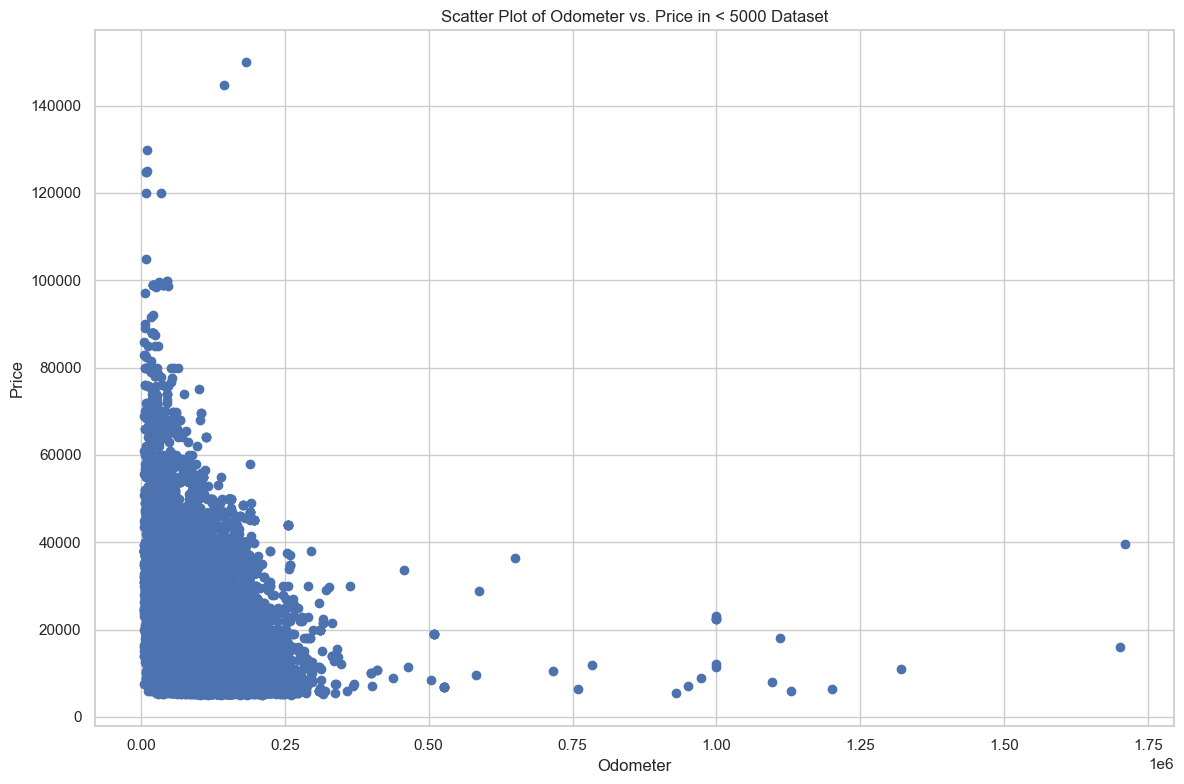

In [662]:
# Lets look at a scatter plot of the odometer and price to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(new_car_data_df1['odometer'], new_car_data_df1['price'])
# set a title and labels
ax.set_title('Scatter Plot of Odometer vs. Price in < 5000 Dataset')
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
plt.show()

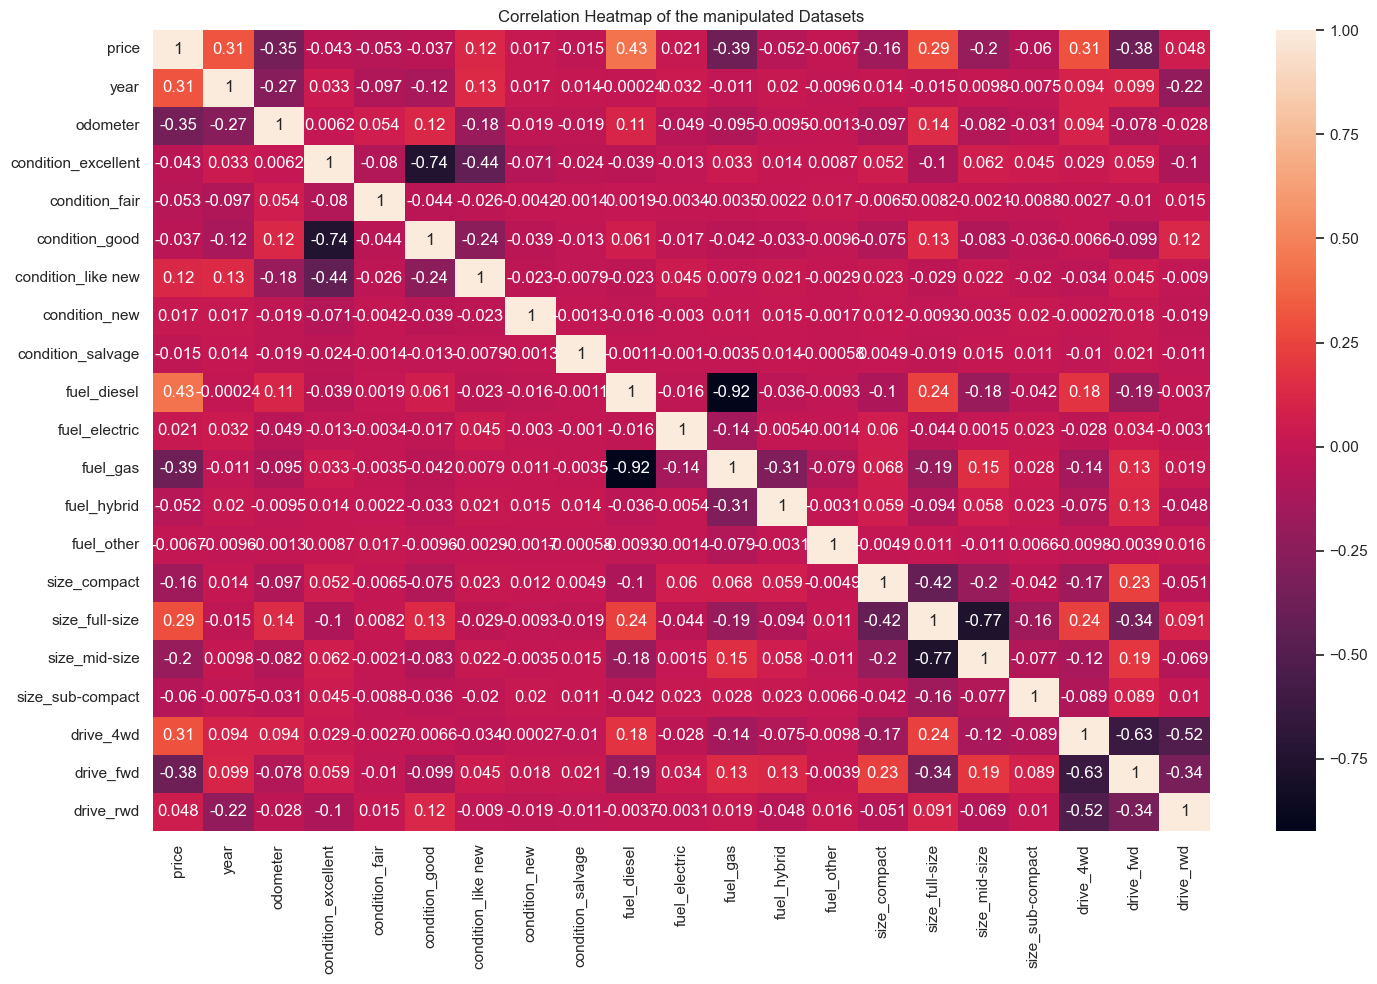

In [663]:
#Some visualizations to review the updated datasets
# Now lets look at the heatmap for the final data set

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(new_car_data_df1.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the manipulated Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

In [664]:
# Run Regression using Odometer and Year for Price Prediction
X2 = new_car_data_df1[['odometer', 'year']]
y2 = new_car_data_df1.price
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)
model2=LinearRegression(fit_intercept=False)
model2.fit(X2_train, y2_train)
print("Coefficient of the model: ",model2.coef_)
print("Intercept of the model: ", model2.intercept_)

Coefficient of the model:  [-0.07321818 13.17246703]
Intercept of the model:  0.0


In [665]:
# get the cofficients
[(col, coef) for col, coef in zip (X2_train.columns, model2.coef_)]

[('odometer', -0.07321818401652598), ('year', 13.172467028829177)]

In [666]:
#Let compute the predictions for the entire set of inputs
train2_predictions=model2.predict(X2_train)
train2_predictions

array([21072.97628069, 24074.24244343, 11001.2769664 , ...,
       17645.90038409, 20214.05376399, 16752.98421172])

In [667]:
#Compute Accuracy and RMSE to training model
score2 = model2.score(X2_train, y2_train)
print("Accuracy: ", round(score2*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y2_train,train2_predictions)), 2))

Accuracy:  12.45
RMSE:      11667.56


In [668]:
# Using the model to make predictions of Price on the test set:
test2_predictions=model2.predict(X2_test)

In [669]:
# Compute Accuracy and RMSE to test model
score2 = model2.score(X2_test, y2_test)
print("Accuracy: ", round(score2*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y2_test,test2_predictions)), 2))

Accuracy:  12.54
RMSE:      11930.52


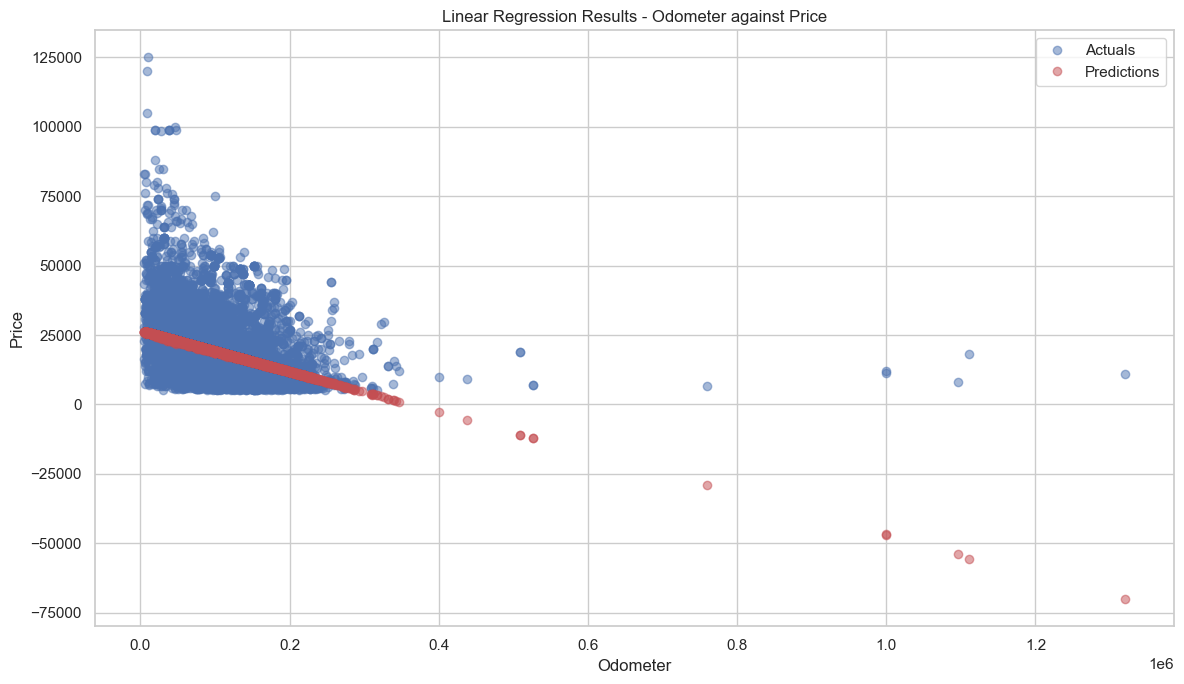

In [670]:
# Visualization of how well the model did by plotting the actual and predicted value

# Combine odometer, actual and predicted values into a DataFrame for easy sorting
results_df = pd.DataFrame({
    'odometer': X2_test['odometer'],
    'actual': y2_test,
    'predicted': test2_predictions
})

# Sort by odometer for smoother line plots
results_df = results_df.sort_values(by='odometer')

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
axes.plot(results_df['odometer'], results_df['actual'], 'ob', label='Actuals', alpha=0.5)
axes.plot(results_df['odometer'], results_df['predicted'], 'or', label='Predictions', alpha=0.5)

# Labels and title
axes.set_xlabel('Odometer')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results - Odometer against Price')
axes.legend()

plt.tight_layout()
plt.show()

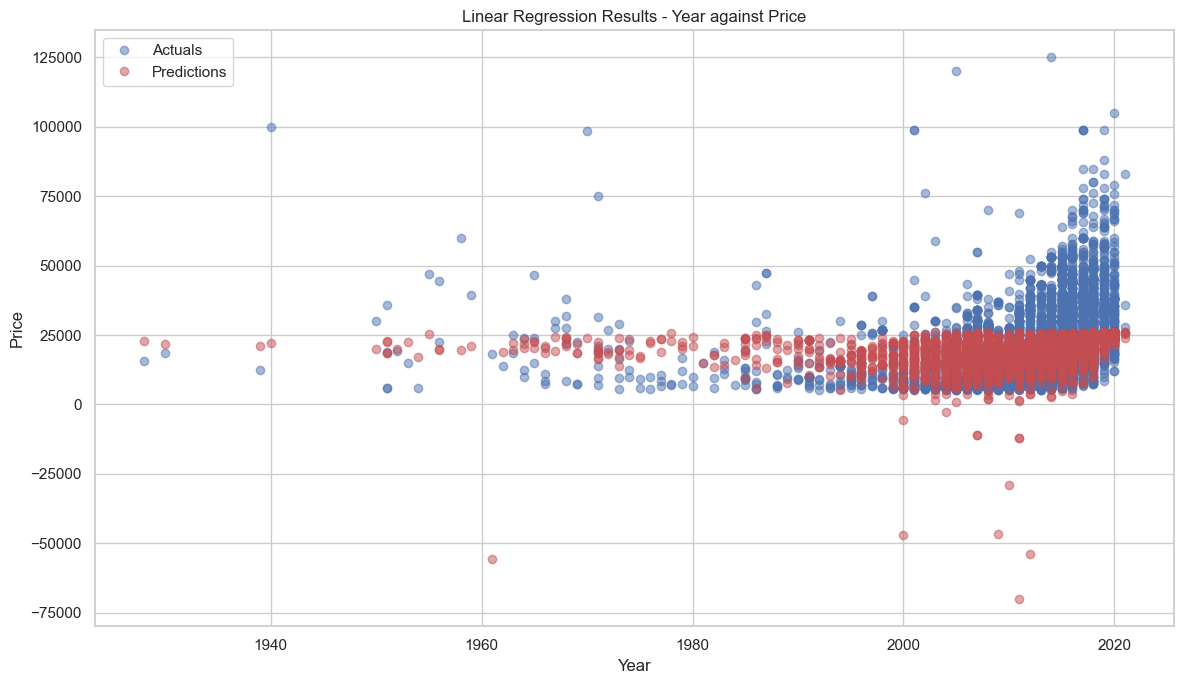

In [671]:


# Combine year, actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    'year': X2_test['year'],
    'actual': y2_test,
    'predicted': test2_predictions
})

# Sort by year for clearer plotting
results_df = results_df.sort_values(by='year')

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
axes.plot(results_df['year'], results_df['actual'], 'ob', label='Actuals', alpha=0.5)
axes.plot(results_df['year'], results_df['predicted'], 'or', label='Predictions', alpha=0.5)

# Labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results - Year against Price')
axes.legend()

plt.tight_layout()
plt.show()

In [672]:
#Prediction using Odometer and year as an input value
new_car = [[100, 2022]]
print("New 2022 Car with 100 miles ", model2.predict(new_car))

New 2022 Car with 100 miles  [26627.40651389]


In [673]:
# Use a loop to build models of degree 1 through 7 on X_train with y1_train as the target. 
# Evaluate the mean_squared_error on the training data and the testing data and save these values as the lists train_mses and test_mses respectively. 
# Determine the model complexity that minimizes the mean_squared_error on the test  data, and assign this as an integer to best_model_complexity below.

train2_mses = []
test2_mses = []
best2_model_complexity = ''

for i in range(1, 7):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X2_train, y2_train)
    train2_preds = pipe.predict(X2_train)
    test2_preds = pipe.predict(X2_test)
    train2_mses.append(mean_squared_error(y2_train, train2_preds))
    test2_mses.append(mean_squared_error(y2_test, test2_preds))
    
best2_model_complexity = test2_mses.index(min(test2_mses)) + 1

print(len(train2_mses))
print(np.round(train2_mses, 2))
print(len(test2_mses))
print(np.round(test2_mses, 2))
print(best2_model_complexity)

6
[1.28648276e+08 1.14358819e+08 1.12537038e+08 1.17756719e+08
 1.16665864e+08 1.25311878e+08]
6
[1.34926745e+08 1.20747774e+08 1.19996314e+08 1.25326684e+08
 1.32031264e+08 1.34303921e+08]
3


The Complexity that minimized Test Error was: 3
The minimal MSE was: 119996314.21


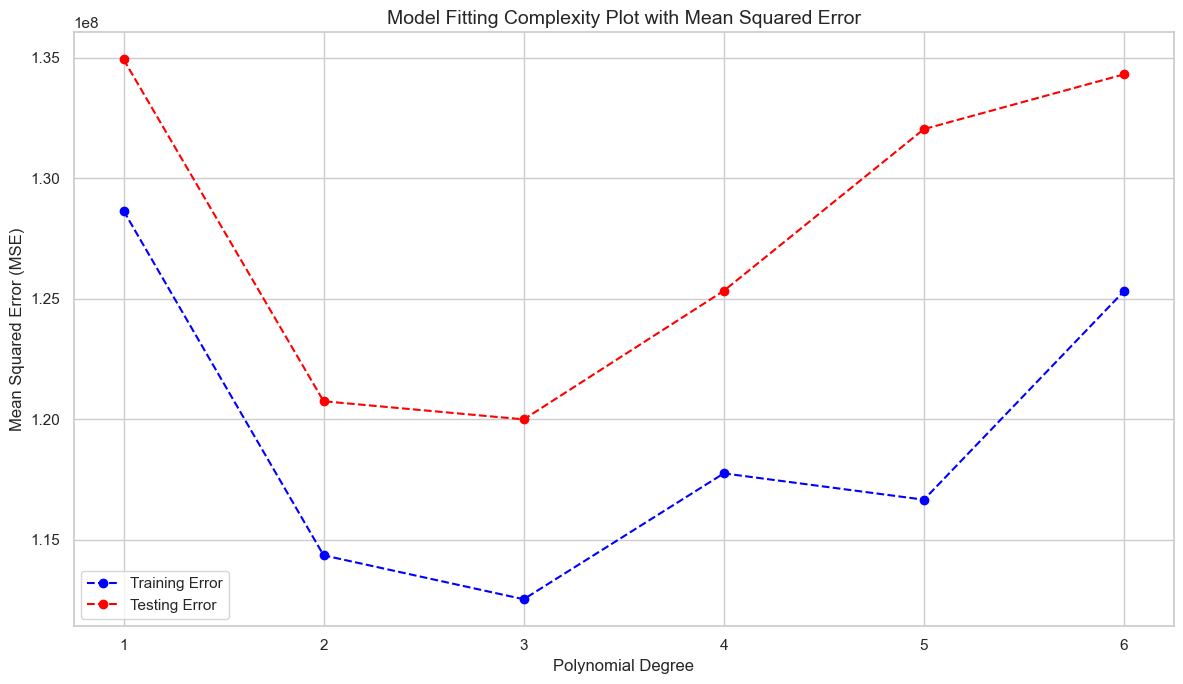

In [674]:
# visualize the results of your model fitting.
# Print summary
optimal_degree = test2_mses.index(min(test2_mses)) + 1
min_test_mse = min(test2_mses)

print(f'The Complexity that minimized Test Error was: {optimal_degree}')
print(f'The minimal MSE was: {min_test_mse:.2f}')
plt.close('all')
# Plot
plt.figure(figsize=(12, 7))
plt.title('Model Fitting Complexity Plot with Mean Squared Error', fontsize=14)

# Plot training and testing MSEs
plt.plot(range(1, 7), train2_mses, '--o', label='Training Error', color='blue')
plt.plot(range(1, 7), test2_mses, '--o', label='Testing Error', color='red')

# Axis and labels
plt.xticks(range(1, 7))
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [675]:
#Use the sklearn.inspection modules implementation of permutation_
# importance to investigate the importance of different features to your regression models

model2 = Ridge(alpha=1e-2).fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

0.17096228389491885

In [676]:
#  permutation_importance function to probe which features are most predictive
r2 = permutation_importance(model2, X2_test, y2_test, n_repeats=30, random_state=0)

In [677]:
# mean values for permutation_importance
perm_df = pd.Series(r2.importances_mean, index=X2_test.columns).sort_values(ascending=False)
perm_df

odometer    0.159575
year        0.110169
dtype: float64

In [678]:
# Based on this permutation importance result, odometer is more important than year

Model3 application will be created using year in the dataset with "odometer > 5000 and price > 5000"

Let's run regression models using other features like year and odometer to see if there is any Strong correlation

Coefficient of the model:  [9.36367277]
Intercept of the model:  0.0
Accuracy:  0.3
RMSE:      12450.35
Accuracy:  0.26
RMSE:      12741.11


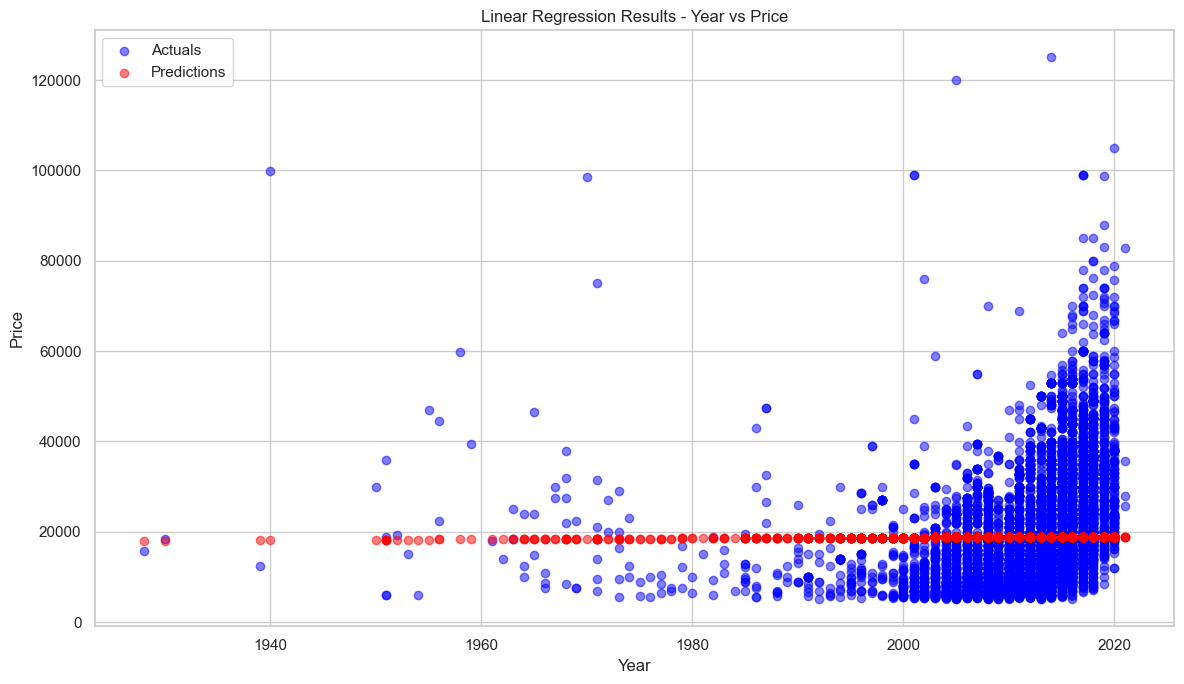

In [680]:
# Run Regression using year for Price Prediction
X3 = new_car_data_df1[['year']]
y3 = new_car_data_df1.price
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)
model3=LinearRegression(fit_intercept=False)
model3.fit(X3_train, y3_train)
print("Coefficient of the model: ",model3.coef_)
print("Intercept of the model: ", model3.intercept_)

#Let compute the predictions for the entire set of inputs
train3_predictions=model3.predict(X3_train)

#Compute Accuracy and RMSE to training model
score3 = model3.score(X3_train, y3_train)
print("Accuracy: ", round(score3*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y3_train,train3_predictions)), 2))

# Using the model to make predictions of Price on the test set:
test3_predictions=model3.predict(X3_test)

# Compute Accuracy and RMSE to test model
score3 = model3.score(X3_test, y3_test)
print("Accuracy: ", round(score3*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y3_test,test3_predictions)), 2))

import matplotlib.pyplot as plt
import pandas as pd

# Combine into a DataFrame for clean plotting
results_df = pd.DataFrame({
    'year': X3_test['year'],
    'actual': y3_test,
    'predicted': test3_predictions
})

# Sort by year for better visual ordering
results_df = results_df.sort_values(by='year')
plt.close('all')
# Plot
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
axes.scatter(results_df['year'], results_df['actual'], color='blue', alpha=0.5, label='Actuals')
axes.scatter(results_df['year'], results_df['predicted'], color='red', alpha=0.5, label='Predictions')

# Labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results - Year vs Price')
axes.legend()

plt.tight_layout()
plt.show()

In [681]:
#Prediction using Year as a value
print("Car with Year of 1940:  ", model3.predict([[1940]]))
print("Car with Year of 1980:  ", model3.predict([[1980]]))
print("Car with Year of 2020:  ", model3.predict([[2020]]))
print("Car with Year of 2023:  ", model3.predict([[2023]]))

Car with Year of 1940:   [18165.5251721]
Car with Year of 1980:   [18540.07208287]
Car with Year of 2020:   [18914.61899363]
Car with Year of 2023:   [18942.71001194]


Coefficient of the model:  [0.11838402]
Intercept of the model:  0.0
Accuracy:  -97.45
RMSE:      17521.26
Accuracy:  -96.91
RMSE:      17901.61


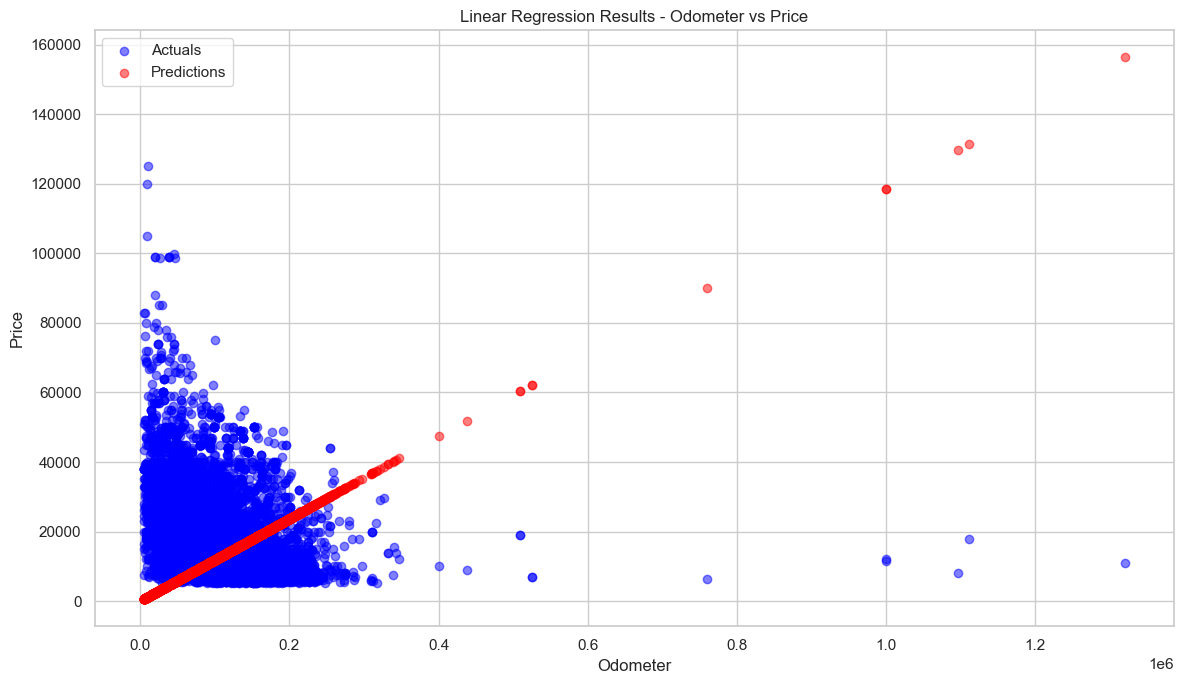

In [682]:
# Run Regression using odometer for Price Prediction
X4 = new_car_data_df1[['odometer']]
y4 = new_car_data_df1.price
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3, random_state = 0)
model4=LinearRegression(fit_intercept=False)
model4.fit(X4_train, y4_train)
print("Coefficient of the model: ",model4.coef_)
print("Intercept of the model: ", model4.intercept_)

#Let compute the predictions for the entire set of inputs
train4_predictions=model4.predict(X4_train)

#Compute Accuracy and RMSE to training model
score4 = model4.score(X4_train, y4_train)
print("Accuracy: ", round(score4*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y4_train,train4_predictions)), 2))

# Using the model to make predictions of Price on the test set:
test4_predictions=model4.predict(X4_test)

# Compute Accuracy and RMSE to test model
score4 = model4.score(X4_test, y4_test)
print("Accuracy: ", round(score4*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y4_test,test4_predictions)), 2))



# Combine test set and predictions for clean plotting
results_df = pd.DataFrame({
    'odometer': X4_test['odometer'],
    'actual': y4_test,
    'predicted': test4_predictions
})

# Sort by odometer for visual clarity
results_df = results_df.sort_values(by='odometer')

# Create scatter plot
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
axes.scatter(results_df['odometer'], results_df['actual'], color='blue', alpha=0.5, label='Actuals')
axes.scatter(results_df['odometer'], results_df['predicted'], color='red', alpha=0.5, label='Predictions')

# Labels and title
axes.set_xlabel('Odometer')
axes.set_ylabel('Price')
axes.set_title('Linear Regression Results - Odometer vs Price')
axes.legend()

plt.tight_layout()
plt.show()

In [683]:
#Prediction using Odometer as an input value
print("Car with Odometer of 10000:  ", model4.predict([[10000]]))
print("Car with Odometer of 50000:  ", model4.predict([[50000]]))
print("Car with Odometer of 90000:  ", model4.predict([[90000]]))
print("Car with Odometer of 100000:  ", model4.predict([[100000]]))

Car with Odometer of 10000:   [1183.84017086]
Car with Odometer of 50000:   [5919.20085429]
Car with Odometer of 90000:   [10654.56153773]
Car with Odometer of 100000:   [11838.40170858]


Model5 application will be created using the full features in the dataset with "odometer > 5000 and price > 5000" to observe the complexity of the model using OneHotEncoder vs get_dummies to convert categorical variable into dummy/indicator variables

In [685]:
# Using OneHotEncoder and permutation importance to determine the main features that impact used car prices
data_copy1 = data_copy.query("odometer > 5000 and price > 5000")
data_copy1.head()

,price,year,condition,fuel,odometer,drive,size
268,9000,2008.0,excellent,gas,56700.0,rwd,compact
337,8950,2011.0,excellent,gas,164000.0,fwd,full-size
346,98900,2001.0,good,gas,20187.0,rwd,mid-size
355,9400,2008.0,good,gas,129473.0,rwd,full-size
364,7300,2007.0,good,gas,181000.0,fwd,mid-size


In [686]:
data_copy1.describe()

,price,year,odometer
count,27816.000000,27816.000000,2.781600e+04
mean,18910.265926,2011.626043,1.047101e+05
std,12557.334892,6.615416,5.932711e+04
min,5100.000000,1927.000000,5.011000e+03
25%,9500.000000,2009.000000,6.691875e+04
50%,14995.000000,2013.000000,1.021260e+05
75%,24990.000000,2016.000000,1.369650e+05
max,150000.000000,2021.000000,1.710000e+06


In [687]:
X5 = data_copy1.drop(columns='price')
y5 = data_copy1['price']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.3, random_state = 0)

In [688]:
# Use a loop to build models of degree 1 through 7 on X_train with y1_train as the target. 
# Evaluate the mean_squared_error on the training data and the testing data and save these values as the lists train_mses and test_mses respectively. 
# Determine the model complexity that minimizes the mean_squared_error on the test  data, and assign this as an integer to best_model_complexity below.
# Also using OneHotEncoder as oppose to get_dummies to see if there are any difference in results
feature_cols = ['odometer', 'year']
train_mses = []
test_mses = []

best_mse = np.inf
best_pipe = None

for i in range (1, 10):
    col_transformer = make_column_transformer ((OneHotEncoder(), ['condition','fuel','drive','size']),
                                              (PolynomialFeatures(degree = i, include_bias=False), feature_cols), 
                                               remainder='passthrough')
    pipe = Pipeline([
        ('col_transformer', col_transformer),
        ('model', LinearRegression())
    ])
    
    pipe.fit(X5_train, y5_train)

    
    train_preds = pipe.predict(X5_train)
    test_preds = pipe.predict(X5_test)
    train_mses.append(mean_squared_error(train_preds, y5_train))
    test_mse = mean_squared_error(test_preds, y5_test)
    if test_mse < best_mse:
        best_mse = test_mse
        best_pipe = pipe
    test_mses.append(test_mse)
     
best_model_complexity = test_mses.index(min(test_mses)) + 1

print(len(train_mses))
print(np.round(train_mses, 2))
print(len(test_mses))
print(np.round(test_mses, 2))
print(best_model_complexity)


9
[7.21384200e+07 5.83762339e+07 1.12537522e+08 1.17756721e+08
 1.16665871e+08 1.25346937e+08 1.39753130e+08 1.46887645e+08
 1.52249860e+08]
9
[7.44246068e+07 6.12120362e+07 1.20019447e+08 1.25328776e+08
 1.32033822e+08 1.34442696e+08 1.80118245e+08 2.30635961e+08
 3.00864452e+08]
2


The Complexity that minimized Test Error was: 2
The minimal MSE was: 61212036.2097872


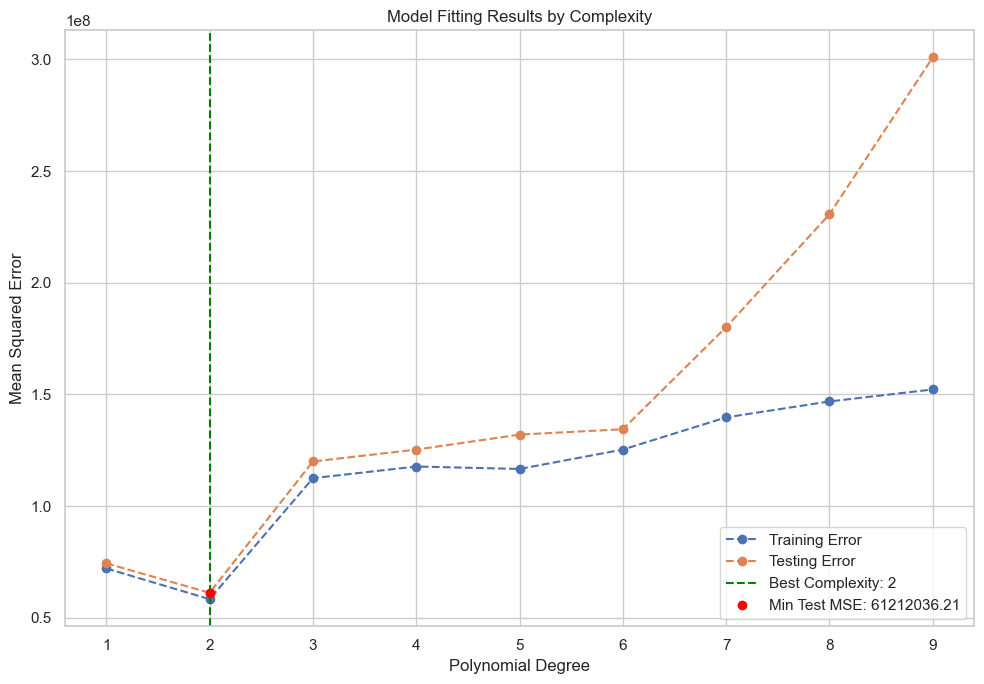

In [689]:
# visualize the results of your model fitting.
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
print(f'The minimal MSE was: {min(test_mses)}')


import matplotlib.pyplot as plt

# Example: assuming test_mses and train_mses are already defined
# Replace them with your actual values if needed

# Find best complexity (i.e., degree with lowest test error)
best_complexity = test_mses.index(min(test_mses)) + 1
min_test_mse = min(test_mses)
plt.close('all')
# Plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), train_mses, '--o', label='Training Error')
plt.plot(range(1, 10), test_mses, '--o', label='Testing Error')

# Highlight the best point
plt.axvline(best_complexity, color='green', linestyle='--', label=f'Best Complexity: {best_complexity}')
plt.scatter([best_complexity], [min_test_mse], color='red', zorder=5, label=f'Min Test MSE: {round(min_test_mse, 2)}')

plt.xticks(range(1, 10))
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Fitting Results by Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Complexity that minimized Test Error value of 2 is similar/exact to some of the Model applications above, so it does not look like there is a difference between using OneHotEncoder vs. get_dummies to onvert categorical variable into dummy/indicator variables

In [691]:
#permutation_importance function to probe which features are most predictive
#r = permutation_importance(best_pipe, X_test, y_test)

Model6 application will be created using the features that have a better correlation with price in the dataset with "odometer > 5000 and price > 5000". These features are odometer, year, fuel_diesel, drive_4wd and size_full-size

In [693]:
# Create a model using Odometer, Year, fuel_diesel, drive_4wd and size_full-size for Price Prediction
# These features are the ones that have a positive correlation with car price
X6 = new_car_data_df1[['odometer', 'year', 'fuel_diesel', 'drive_4wd', 'size_full-size']]
y6 = new_car_data_df1.price
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.3, random_state = 0)
model6=LinearRegression(fit_intercept=False)
model6.fit(X6_train, y6_train)
print("Coefficient of the model: ",model6.coef_)
print("Intercept of the model: ", model6.intercept_)

#Let compute the predictions for the entire set of inputs
train6_predictions=model6.predict(X6_train)

#Compute Accuracy and RMSE to training model
score6 = model6.score(X6_train, y6_train)
print("Accuracy: ", round(score6*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y6_train,train6_predictions)), 2))

# Using the model to make predictions of Price on the test set:
test6_predictions=model6.predict(X6_test)

# Compute Accuracy and RMSE to test model
score6 = model6.score(X6_test, y6_test)
print("Accuracy: ", round(score6*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y6_test,test6_predictions)), 2))

Coefficient of the model:  [-9.29055281e-02  1.03483761e+01  1.63674361e+04  5.73780578e+03
  5.37707748e+03]
Intercept of the model:  0.0
Accuracy:  45.26
RMSE:      9226.0
Accuracy:  46.88
RMSE:      9298.39


In [694]:
## Prediction using Odometer, Year, fuel_diesel, drive_4wd and size_full_size as input


print("Car with Year of 1990, 100k Miles with Diesel Fuel, 4WD and Full Size: ", model6.predict([[100000,1990,1,1,1]]))
print("Car with Year of 1990, 100k Miles with No Diesel Fuel, 4WD and Full Size: ", model6.predict([[100000,1990,0,1,1]]))

print("Car with Year of 2020, 10k Miles with Diesel Fuel, 4WD and Full Size: ", model6.predict([[10000,2020,1,1,1]]))
print("Car with Year of 2020, 10k Miles with No Diesel Fuel, 4WD and Full Size: ", model6.predict([[10000,2020,0,1,1]]))

Car with Year of 1990, 100k Miles with Diesel Fuel, 4WD and Full Size:  [38785.03501702]
Car with Year of 1990, 100k Miles with No Diesel Fuel, 4WD and Full Size:  [22417.5988814]
Car with Year of 2020, 10k Miles with Diesel Fuel, 4WD and Full Size:  [47456.98382732]
Car with Year of 2020, 10k Miles with No Diesel Fuel, 4WD and Full Size:  [31089.5476917]


In [695]:
#Use the sklearn.inspection modules implementation of permutation_
# importance to investigate the importance of different features to your regression models

model6R = Ridge(alpha=1e-2).fit(X6_train, y6_train)
model6R.score(X6_test, y6_test)

0.49799687562124473

In [696]:
#  permutation_importance function to probe which features are most predictive
r6 = permutation_importance(model6R, X6_test, y6_test, n_repeats=30, random_state=0)
# mean values for permutation_importance
perm_df6 = pd.Series(r6.importances_mean, index=X6_test.columns).sort_values(ascending=False)
perm_df6

fuel_diesel       0.306407
odometer          0.299662
drive_4wd         0.086750
size_full-size    0.086642
year              0.072825
dtype: float64

In [697]:
# Reconstruct perm_df6 from X6_test and r6.importances_mean
import pandas as pd

perm_df6 = pd.DataFrame({
    'feature': X6_test.columns,
    'importance_mean': r6.importances_mean
})

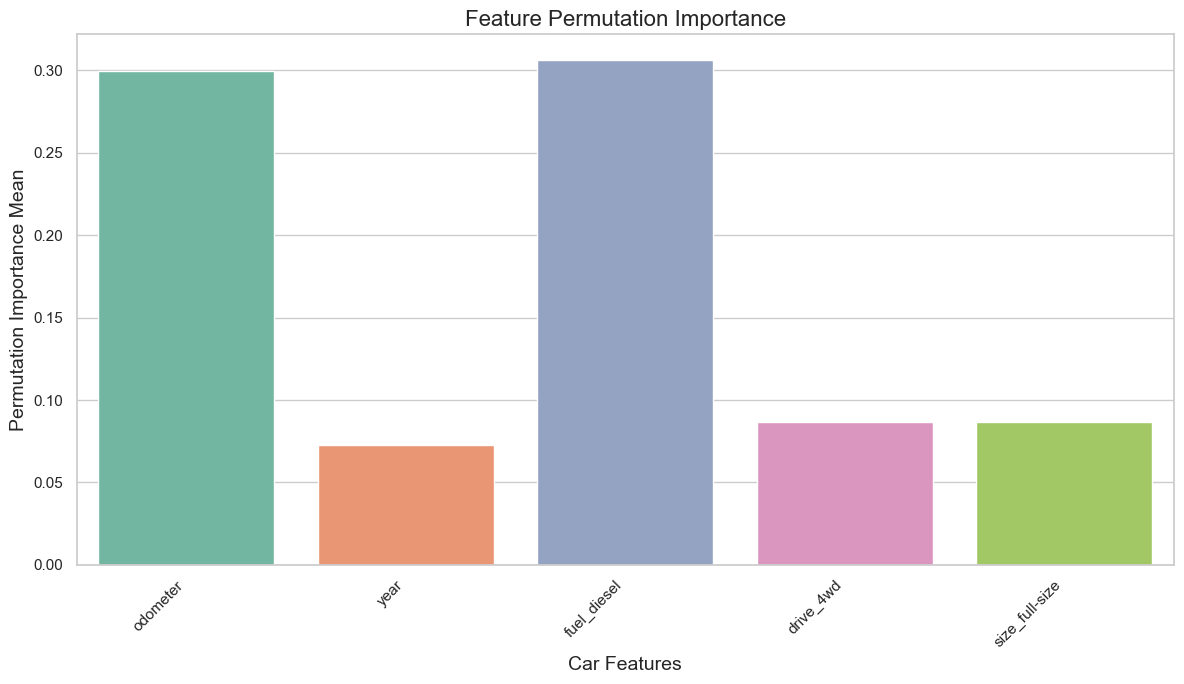

In [698]:
# Bar chart plot of the mean values for permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
plt.figure(figsize=(12, 7))
sns.barplot(
    x='feature',
    y='importance_mean',
    data=perm_df6,
    palette='Set2'
)
plt.title("Feature Permutation Importance", fontsize=16)
plt.ylabel("Permutation Importance Mean", fontsize=14)
plt.xlabel("Car Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Using the Histogram plot below, we are going to create the final model using the following:

Used Cars from 1990 Odometer, Year, fuel_diesel, drive_4wd and size_full-size features

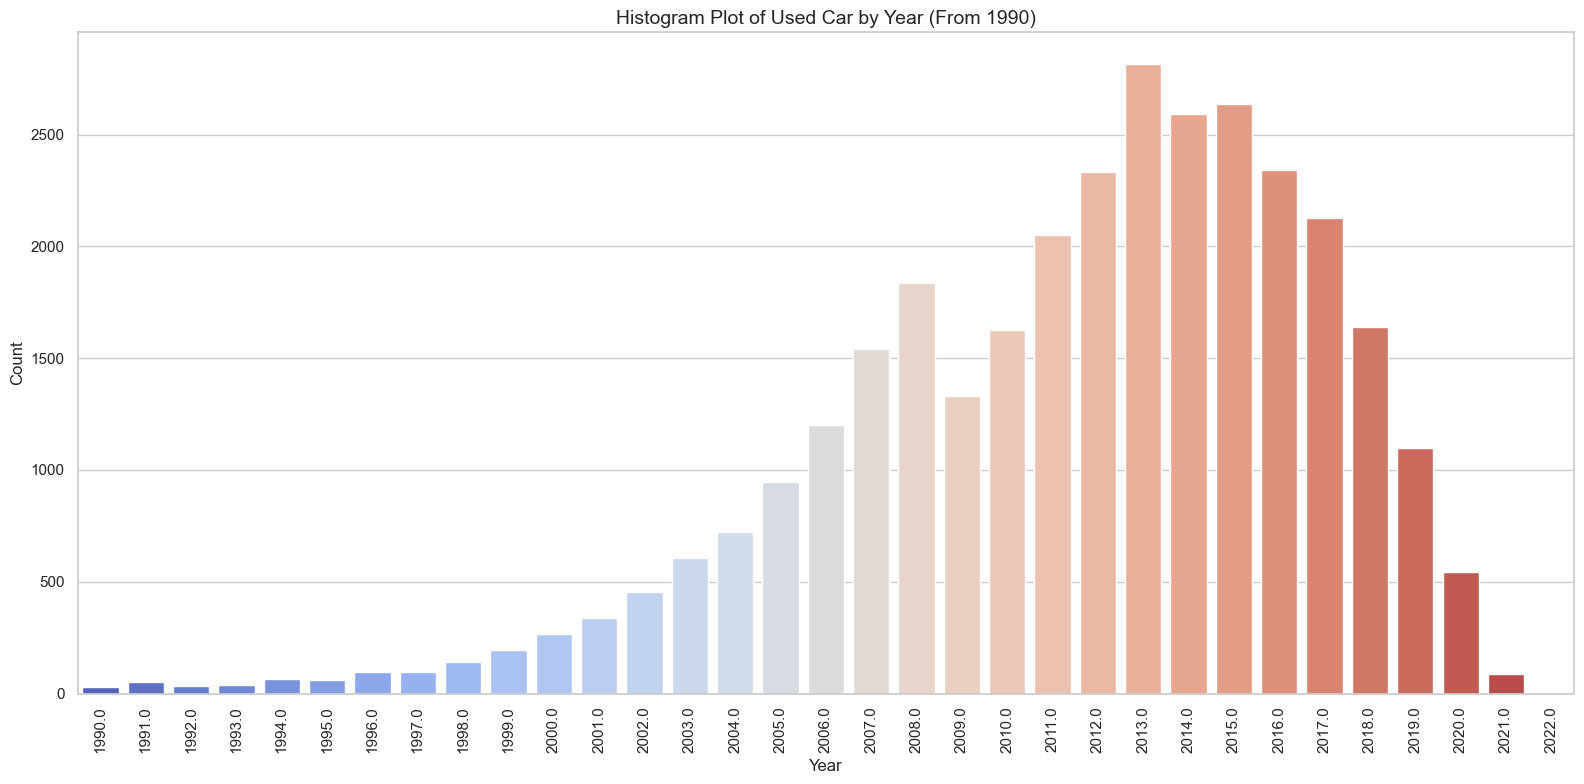

In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset to include only cars from 1990 onward
filtered_data = data_copy[data_copy['year'] >= 1990]

# Sort years for aesthetic consistency
filtered_data = filtered_data.sort_values(by='year')

# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", len(filtered_data['year'].unique()))

# Plot histogram using countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='year', data=filtered_data, palette=colors)

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram Plot of Used Car by Year (From 1990)', fontsize=14)
plt.tight_layout()

plt.show()

In [701]:
# Create a new dataframe with used cars from 1990 onwards
new_car_data_1990_df = new_car_data_df1.query("year > 1990")
new_car_data_1990_df.head()

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
268,9000,2008.0,56700.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
337,8950,2011.0,164000.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
346,98900,2001.0,20187.0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
355,9400,2008.0,129473.0,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
364,7300,2007.0,181000.0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


In [702]:
# Number of the records in the dataset
new_car_data_1990_df.shape

(27444, 21)

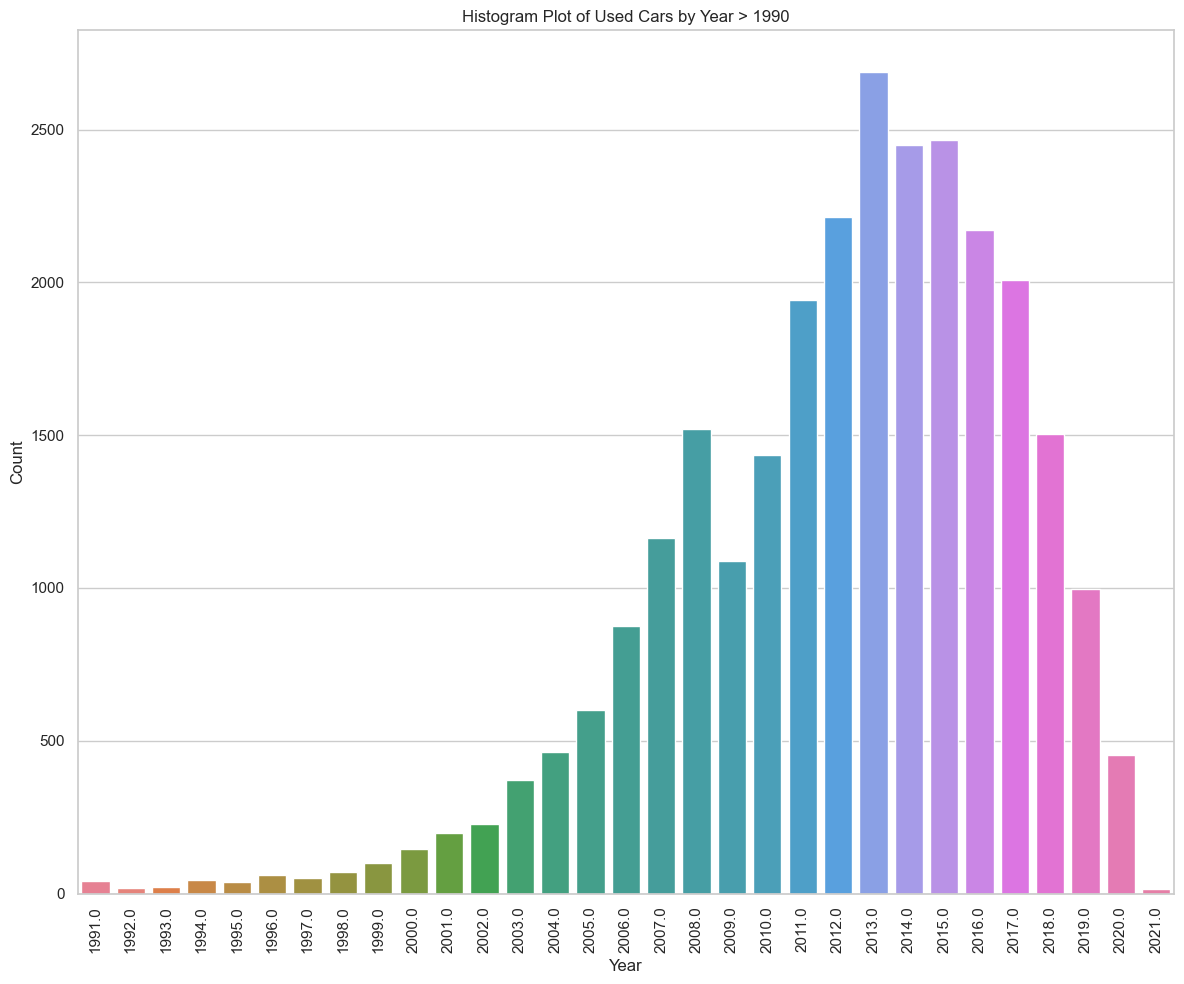

In [703]:
# Plot the number of used car counts by year after filtering records to > 1900

import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of unique years for dynamic coloring
num_years = new_car_data_1990_df['year'].nunique()

# Choose a color palette with enough colors
palette = sns.color_palette("husl", num_years)  # or try "coolwarm", "Set3", etc.

# Plot the count of used cars by year
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(x='year', data=new_car_data_1990_df, ax=ax, palette=palette)

# Customize plot
ax.set_title("Histogram Plot of Used Cars by Year > 1990")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Model7 application will be created using the features that have a better correlation with price in the dataset with "odometer > 5000 and price > 5000" and year > 1990. These features are odometer, year, fuel_diesel, drive_4wd and size_full-size

In [705]:
# Create a model using Odometer, Year, fuel_diesel, drive_4wd and size_full-size for Price Prediction
# These features are the ones that have a positive correlation with car price
X7 = new_car_data_1990_df[['odometer', 'year', 'fuel_diesel', 'drive_4wd', 'size_full-size']]
y7 = new_car_data_1990_df.price
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.3, random_state = 0)
model7=LinearRegression(fit_intercept=False)
model7.fit(X7_train, y7_train)
print("Coefficient of the model: ",model7.coef_)
print("Intercept of the model: ", model7.intercept_)

#Let compute the predictions for the entire set of inputs
train7_predictions=model7.predict(X7_train)

#Compute Accuracy and RMSE to training model
score7 = model7.score(X7_train, y7_train)
print("Accuracy: ", round(score7*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y7_train,train7_predictions)), 2))

# Using the model to make predictions of Price on the test set:
test7_predictions=model7.predict(X7_test)

# Compute Accuracy and RMSE to test model
score7 = model7.score(X7_test, y7_test)
print("Accuracy: ", round(score7*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(y7_test,test7_predictions)), 2))

Coefficient of the model:  [-9.79393406e-02  1.05400863e+01  1.65377878e+04  5.88123006e+03
  5.50763744e+03]
Intercept of the model:  0.0
Accuracy:  47.52
RMSE:      9089.08
Accuracy:  48.26
RMSE:      8970.29


In [706]:
## Prediction using Odometer, Year, fuel_diesel, drive_4wd and size_full_size as input


print("Car with Year of 1990, 100k Miles with Diesel Fuel, 4WD and Full Size: ", model7.predict([[100000,1990,1,1,1]]))
print("Car with Year of 1990, 100k Miles with No Diesel Fuel, 4WD and Full Size: ", model7.predict([[100000,1990,0,1,1]]))

print("Car with Year of 2020, 10k Miles with Diesel Fuel, 4WD and Full Size: ", model7.predict([[10000,2020,1,1,1]]))
print("Car with Year of 2020, 10k Miles with No Diesel Fuel, 4WD and Full Size: ", model7.predict([[10000,2020,0,1,1]]))

Car with Year of 1990, 100k Miles with Diesel Fuel, 4WD and Full Size:  [39107.49298477]
Car with Year of 1990, 100k Miles with No Diesel Fuel, 4WD and Full Size:  [22569.70514759]
Car with Year of 2020, 10k Miles with Diesel Fuel, 4WD and Full Size:  [48238.23622874]
Car with Year of 2020, 10k Miles with No Diesel Fuel, 4WD and Full Size:  [31700.44839156]


In [707]:
#Use the sklearn.inspection modules implementation of permutation_
# importance to investigate the importance of different features to your regression models

model7R = Ridge(alpha=1e-2).fit(X7_train, y7_train)
model7R.score(X7_test, y7_test)

0.5613509556616727

In [708]:
#  permutation_importance function to probe which features are most predictive
r7 = permutation_importance(model7R, X7_test, y7_test, n_repeats=30, random_state=0)
# mean values for permutation_importance
perm_df7 = pd.Series(r7.importances_mean, index=X7_test.columns).sort_values(ascending=False)
perm_df7

fuel_diesel       0.318646
year              0.208185
odometer          0.204708
drive_4wd         0.088106
size_full-size    0.085358
dtype: float64

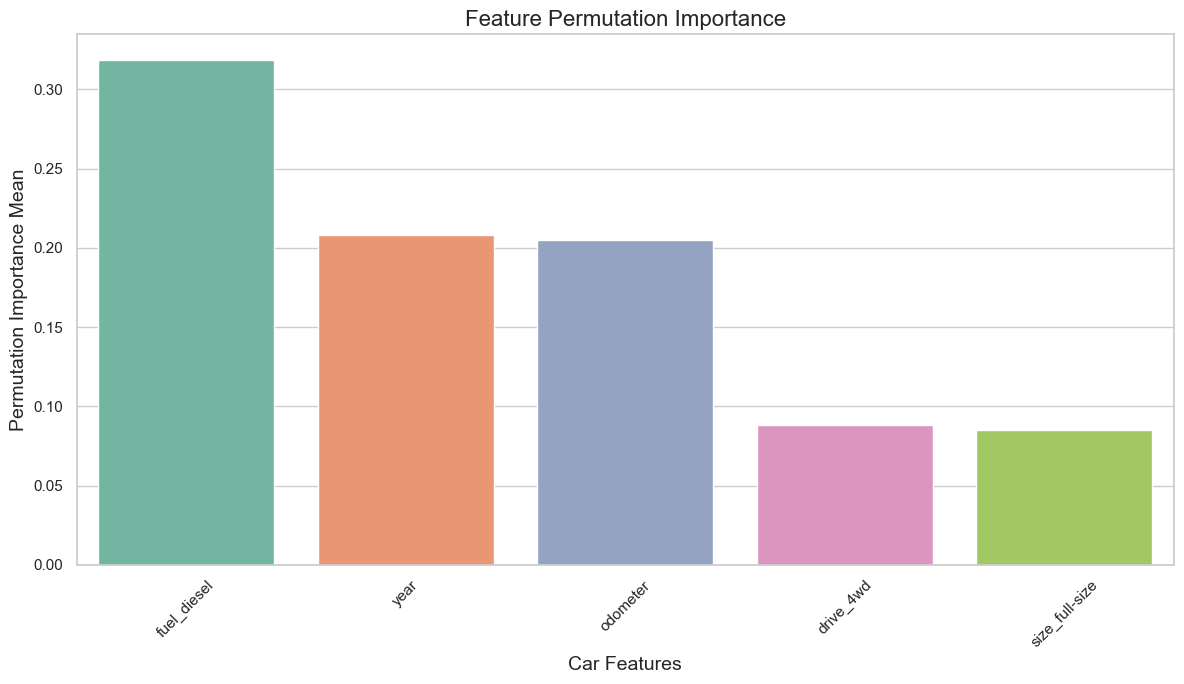

In [709]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure perm_df7 is properly structured
# Example: perm_df7 = pd.DataFrame({'feature': X7_test.columns, 'importance_mean': r7.importances_mean})

perm_df7 = pd.DataFrame({
    'feature': X7_test.columns,
    'importance_mean': r7.importances_mean
})

# Sort for cleaner display (optional)
perm_df7 = perm_df7.sort_values(by='importance_mean', ascending=False)

# Create the bar plot with a color palette
plt.figure(figsize=(12, 7))
sns.barplot(x='feature', y='importance_mean', data=perm_df7, palette='Set2')

# Add titles and labels
plt.title("Feature Permutation Importance", fontsize=16)
plt.ylabel("Permutation Importance Mean", fontsize=14)
plt.xlabel("Car Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Evaluation

With initial modeling completed, we now turn our focus to evaluating what defines a high-quality model and the insights it offers. This reflection includes revisiting our business objective to assess how effectively we can derive meaningful insights into the factors influencing used car prices. Your task is to distill these findings and determine whether earlier phases require revision and refinement or if there is valuable information to present to the client.

Data Quality and Preparation Observations:
The dataset’s quality presents challenges, including missing values and unrealistic entries—such as a price of $0 or an odometer reading of zero—which are not representative of real-world used car listings. Standardization or normalization techniques (e.g., mean and median) were difficult to apply for odometer and price values due to the varying characteristics of vehicles, such as fuel type, condition, size, and color. To ensure accuracy in data preparation and manipulation, these records were removed.

Additionally, features such as ID, VIN, state, manufacturer, and model were excluded from the analysis, as they were deemed to have minimal impact on determining used car prices.

Regression Model Observations:
The core business objective is to identify key determinants of used car prices within the provided dataset, equipping car dealers and sales professionals with insights to optimize inventory for increased sales.

To achieve this, multiple models were tested—one using the full set of features following data preprocessing, and another leveraging a subset of features based on correlation analysis with used car prices.

For Most of these Models, the accuracy was less than 50% with the exception of the last 2 models. See table below:

| Model Name | Description | Accuracy Score (Training) | Accuracy Score (Test) | |------------- |:---------------------------------------------------------------------------------------------------------------------------------- |:-------------------------: |:----------------------: | | Model | Built with all features from data manipulation dataset | 44.54 | 43.09 | | Model1 | Odometer and Year as inputs from data manipulation dataset | 6.94 | 1.92 | | Model2 | Odometer and Price greater than 5000, Odometer and Year as inputs | 12.45 | 12.54 | | Model3 | Odometer and Price greater than 5000, Year as the only input | 0.3 | 0.26 | | Model4 | Odometer and Price greater than 5000, odometer as the only input | -97.45 | -96.91 | | Model6 | Odometer and Price greater than 5000 with Odometer, Year, fuel_diesel, drive_4wd and size_full-size as the only inputs | 45.26 | 46.88 | | Model7 | Odometer and Price greater than 5000 and Year > 1990 with Odometer, Year, fuel_diesel, drive_4wd and size_full-size as the only inputs | 47.52 | 48.26 | | | | | |

Based on the scores, there is still some way to go to get to a model with a higher accuracy score with the highest score for training and testing data currently less than 50%

It's also not a coincidence that the highest score of 47.52% and 48.26% reflects the highest numbers for correlation between these features and price from the correlation matrix.

In testing these models with the inputs, we observed the following for used car prices:

| Model Name | Test Description | Predicted Used Car Price ($) | |------------- |:-------------------------------------------------------------------------------------- |:----------------------------: | | Model | New car with 100 miles, condition excellent and new with diesel and four wheel drive | -98,263.87 | | Model | New car with 100 miles, condition good and with Electric and front wheel drive | 29,013.33 | | Model1 | New car with 100 miles | 21,112.15 | | Model1 | Old 2001 car with 90000 miles | 17,566.90 | | Model2 | New 2022 Car with 100 miles | 26,627.40 | | Model3 | Car with Year of 1980 | 18,540.07 | | Model3 | Car with Year of 2020 | 18,914.62 | | Model4 | Car with Odometer of 50000 | 5,919.20 | | Model4 | Car with Odometer of 100000 | 11,838.40 | | | | |

As you can see, the Machine Learning application "Model" built using all the final dataset from the data manipulation phase which included features like Odometer, Year, Condition, fuel type, drive train and size returns a negative value (i.e., -$98,263.87) which is not realistic for a "new car with 100 miles, condition excellent and new with diesel and four wheel drive".

Same Model returned $29,013.33 for new car with 100 miles, condition good and with Electric and front wheel drive.

For ML Applications Model6 and Model7 which are the recommended/selected models, see below for the prediction testing results:

| Test Description | Predicted Used Car Price Model6 | Predicted Used Car Price Model7 ($) | |:-------------------------------------------------------------------------- |:-------------------------------: |:-------------------------------: | | Car with Year of 1940, 100k Miles with Diesel Fuel, 4WD and Full Size | 38,785.04 | 39,107.49 | | Car with Year of 1990, 100k Miles with No Diesel Fuel, 4WD and Full Size | 22,417.60 | 22,569.71 | | Car with Year of 2020, 10k Miles with Diesel Fuel, 4WD and Full Size | 47,456.98 | 48,238.24 | | Car with Year of 2020, 10k Miles with No Diesel Fuel, 4WD and Full Size | 31,089.55 | 31,700.49 | | | | |

With regards to high quality model based on the dataset provided, Model6 and Model7 are the recommended models.

When we analyze the importance of feature selection based on the trained model, we observe the following order

Model6 - Diesel Fuel, Odometer, Four Wheel Drive, Full Size and Year Model7 - Diesel Fuel, Year, Odometer, Four Wheel Drive and Full Size In summary, I believe we can report back to the Client on their results of the modeling on their used car datasets. See below for this summary report.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Introduction

This machine learning application has been built using a dataset on over 400k used car sales over a century to analyze the factors that make a car more or less expensive so that your organization and Sales Team understand the what your consumers value in used cars.

The objective is to provide you with insights so that you can tune your inventory with the cars that consumers are looking for and ultimately increase your sales and revenue.

For this application, we used a machine learning process which starts with gathering the data, cleaning, preparing and manipulating the data, training the model then testing to get predicted values and measure accuracy. As part of the life cycle, additional data from your sales should be used on an on-going bases to “improve” the model which leads to higher prediction accuracy on the factors that your consumers are looking for in a used car.


### Findings

#### Data Processing

The initial observation from the provided data was its lack of cleanliness, as it contained missing values and unrealistic entries for used cars—for instance, odometer readings with zero or single-digit values, as well as prices that were similarly unreasonably low.

#### Summary of Data Preparation:
- Eliminate records where the price or odometer values are zero.

- Remove entries with incomplete factor data.

- Drop irrelevant factors such as VIN, ID, and region, as they do not significantly impact used car price determination.

- Analyze and exclude additional factors (e.g., state, paint color, manufacturer, transmission) based on their influence on car pricing within the dataset.

- Filter records based on the year of manufacture, setting a threshold at 1990, as the number of used cars predating that year was minimal.
#### Data Application

With this data preparation, we used the following factors in building the Machine Learning application

. Price

. Year

. Condition

. Fuel Type

. Odometer

. Drive Train

. Size

In building and testing the application we observed that using car records with year greater than 1990 provided the best accuracy for the provided dataset. We simply have more records for this period as shown in the diagram below:

This data provided an application with an accuracy of 47%+ when predicting used car prices using factors like odometer, year, fuel type, drive train and size.

When we analyzed the factors contributing to the used car price in the application, we observed the following order of importance:

. Diesel Fuel

. Year

. Odometer

. Four Wheel Drive

. Full Size

Based on the dataset findings, consumer interest appears to be highest for diesel-fueled vehicles, followed by the year and odometer reading, which are often linked—a newer car typically has lower mileage, though exceptions exist, such as rental cars. Four-wheel drive (also known as all-wheel drive) and full-size cars rank as the fourth and fifth most influential features.

#### Conclusion:
Given the dataset contains incomplete and inconsistent values—including null, NaN, zero, missing, and unrealistic entries—further filtering could refine the analysis, such as focusing on used cars manufactured in 2000 or later.

This approach would allow the model to leverage newer vehicle attributes, including model, cylinders, drive type, and size—factors that may exert greater influence on pricing for newer used cars with lower mileage. Such improvements could lead to enhanced model accuracy (potentially exceeding 50%).

To further improve predictive performance, additional high-quality data should be collected. This expanded dataset should incorporate modern used car features, such as automated driving safety systems, infotainment options, cameras, remote start functionality, and mileage—all of which impact vehicle pricing.

Next Steps:
While deploying the recommended models (e.g., Model7) is feasible, prioritizing the collection of higher-quality data is advised. A refined dataset—limited to vehicles no older than 10–15 years—could yield a model with an accuracy of 75% or higher.
